In [48]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
#Import the data
df_Data_Train = pd.read_csv("/Users/mohammedyoussef/Downloads/house-prices-advanced-regression-techniques/train.csv")
df_Data_Train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [50]:
df_Data_Train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [51]:
df_Data_Train['SalePrice'].isna().sum()

0

In [52]:
df_Data_Train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [53]:
df_Data_Train_Salesprice = df_Data_Train['SalePrice']


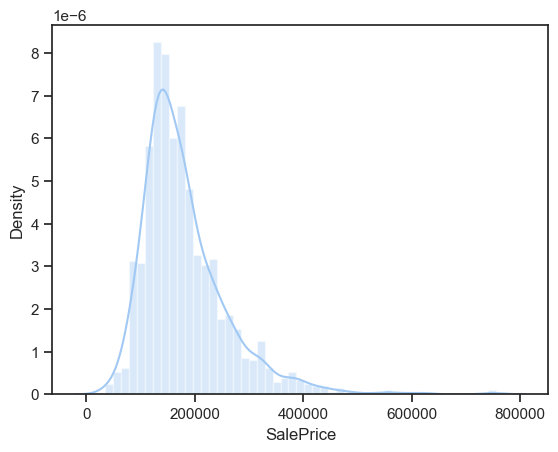

In [54]:
#understand if the data is already has a normal behaviour
# histogram
sns.set_theme(style="ticks", palette="pastel")
sns.distplot(df_Data_Train_Salesprice)
plt.show()

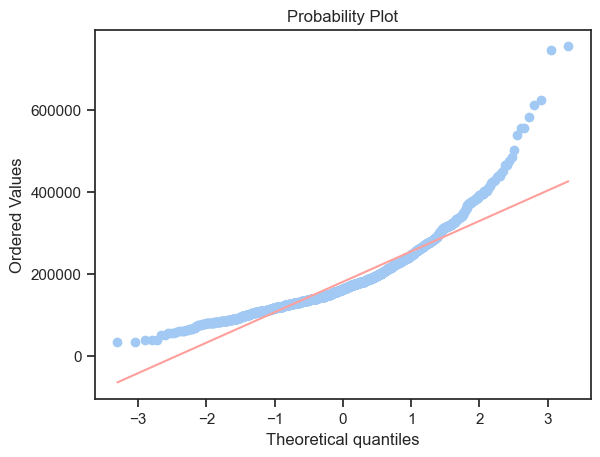

In [55]:
# normality plot
stats.probplot(df_Data_Train_Salesprice, dist="norm",plot=plt)
plt.show()

In [56]:
df_Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
df_Data_Train.select_dtypes(exclude=['object']).describe().round(decimals=2)

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count    1460.00       1460.00     1452.00     1460.00  ...     1460.00   
mean     1971.27       1984.87      103.69      443.64  ...       94.24   
std        30.20         20.65      181.07      456.10  ...      125.34   
min      1872.00       1950.00        0.00        0.00  ...        0.00   
25%      1954.00       1967.00        0.00        0.00  ...        0.00   
50%      1973.00       1994.00        0.00      383.50  ...        0.00   
75%      2000.00       2004.00      166.00      712.25  ...      168.00   
max      2010.00       2010.00     1600.00     5644.00  ...      857.00   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count      1460.00        1460.00    1460.00      1460.00   1460.00   1460.00   
mean         46.66          21.95       3.41        15.06      2.76     43.49   
std          66.26          61.12      29.32        55.76     40.18    496.12   
min           0.00           0.00       0.00         0.00      0.00      0.00   
25%           0.00           0.00       0.00         0.00      0.00      0.00   
50%          25.00           0.00       0.00         0.00      0.00      0.00   
75%          68.00           0.00       0.00         0.00      0.00      0.00   
max         547.00         552.00     508.00       480.00    738.00  15500.00   

        MoSold   YrSold  SalePrice  
count  1460.00  1460.00     1460.0  
mean      6.32  2007.82   180921.2  
std       2.70     1.33    79442.5  
min       1.00  2006.00    34900.0  
25%       5.00  2007.00   129975.0  
50%       6.00  2008.00   163000.0  
75%       8.00  2009.00   214000.0  
max      12.00  2010.00   755000.0  

[8 rows x 38 columns]

In [58]:
numerical_atribute = df_Data_Train.select_dtypes(exclude='object').drop(['SalePrice', 'Id'], axis = 1).copy()

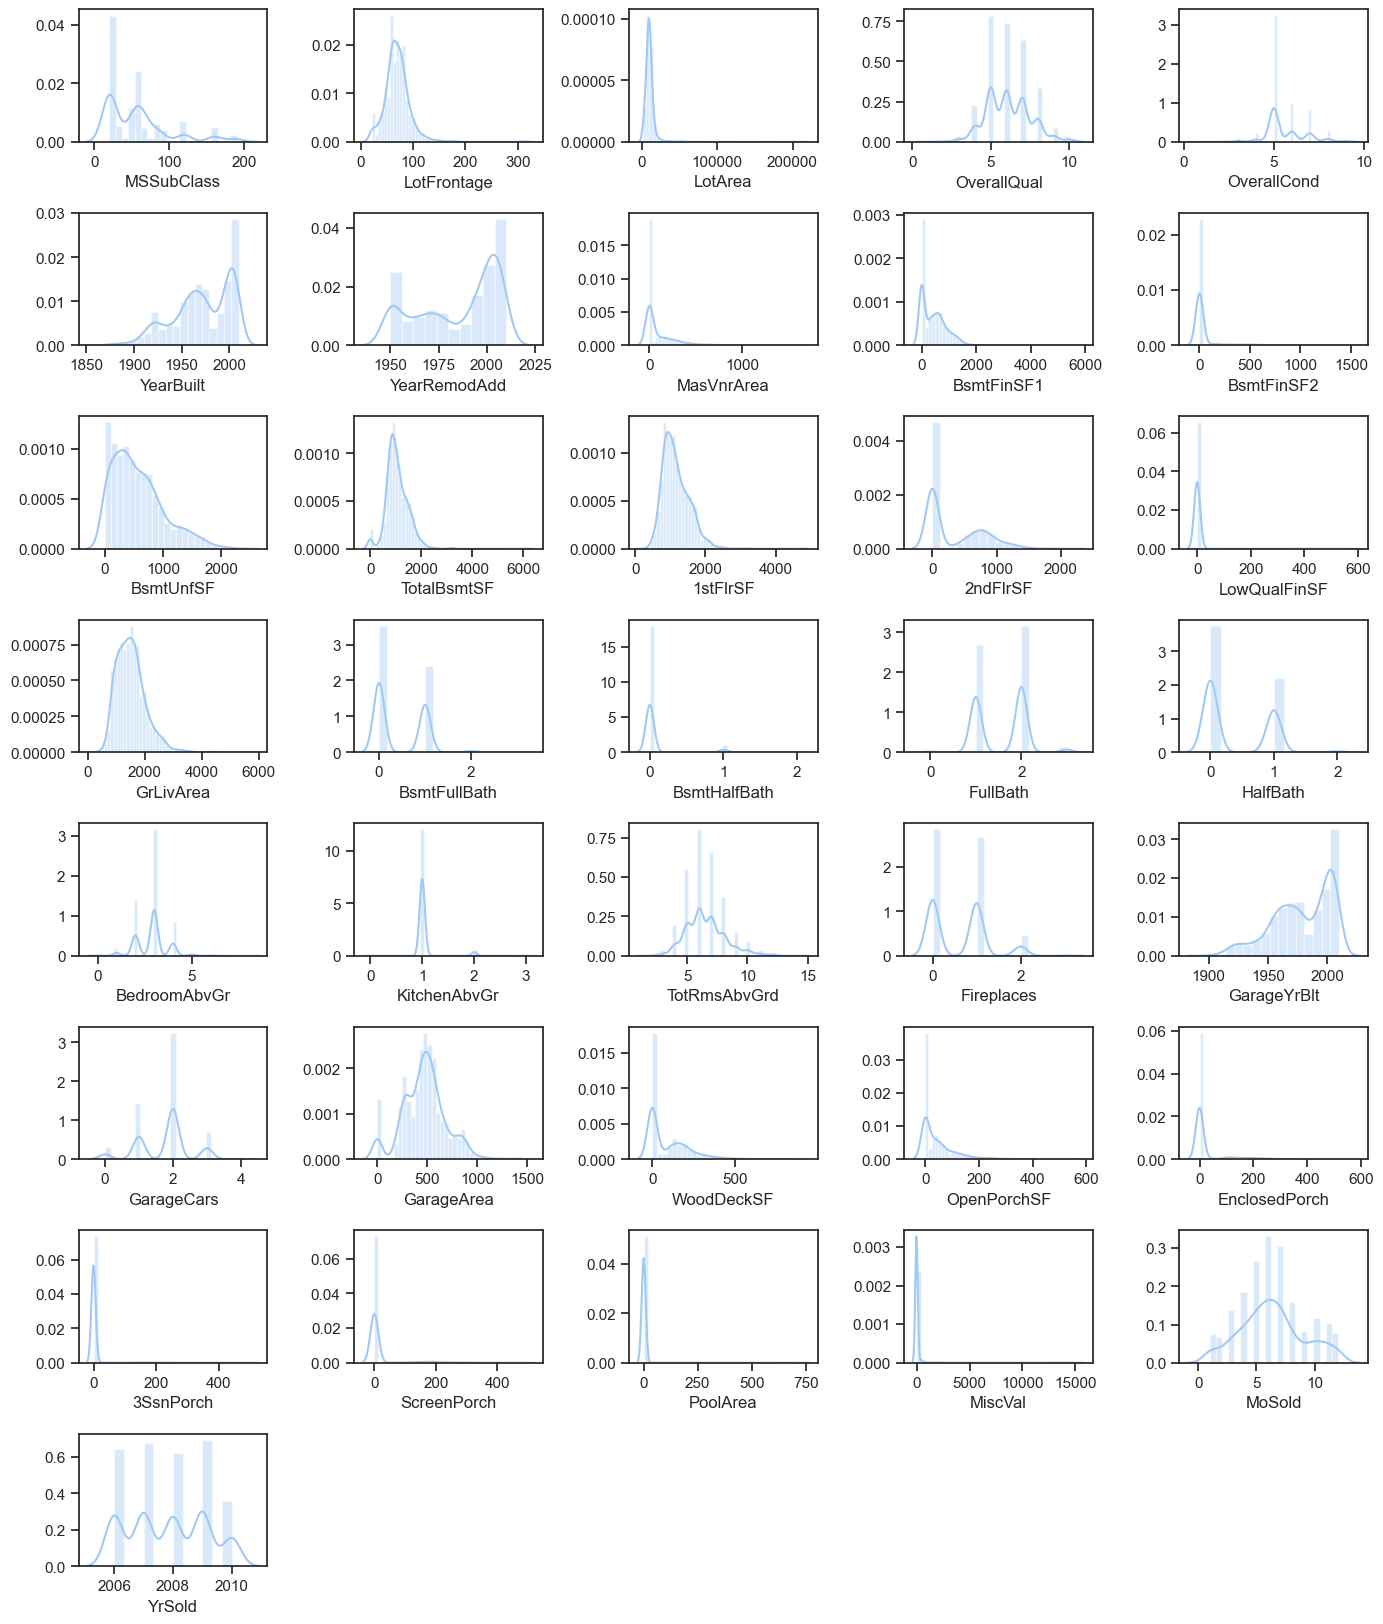

In [59]:
fig = plt.figure(figsize=(14, 20))

for i in range(len(numerical_atribute.columns)): 
    fig.add_subplot(10,5,i+1)
    sns.distplot(numerical_atribute.iloc[:,i].dropna())
    plt.xlabel(numerical_atribute.columns[i])
    plt.ylabel("")

plt.tight_layout()
plt.show()
    

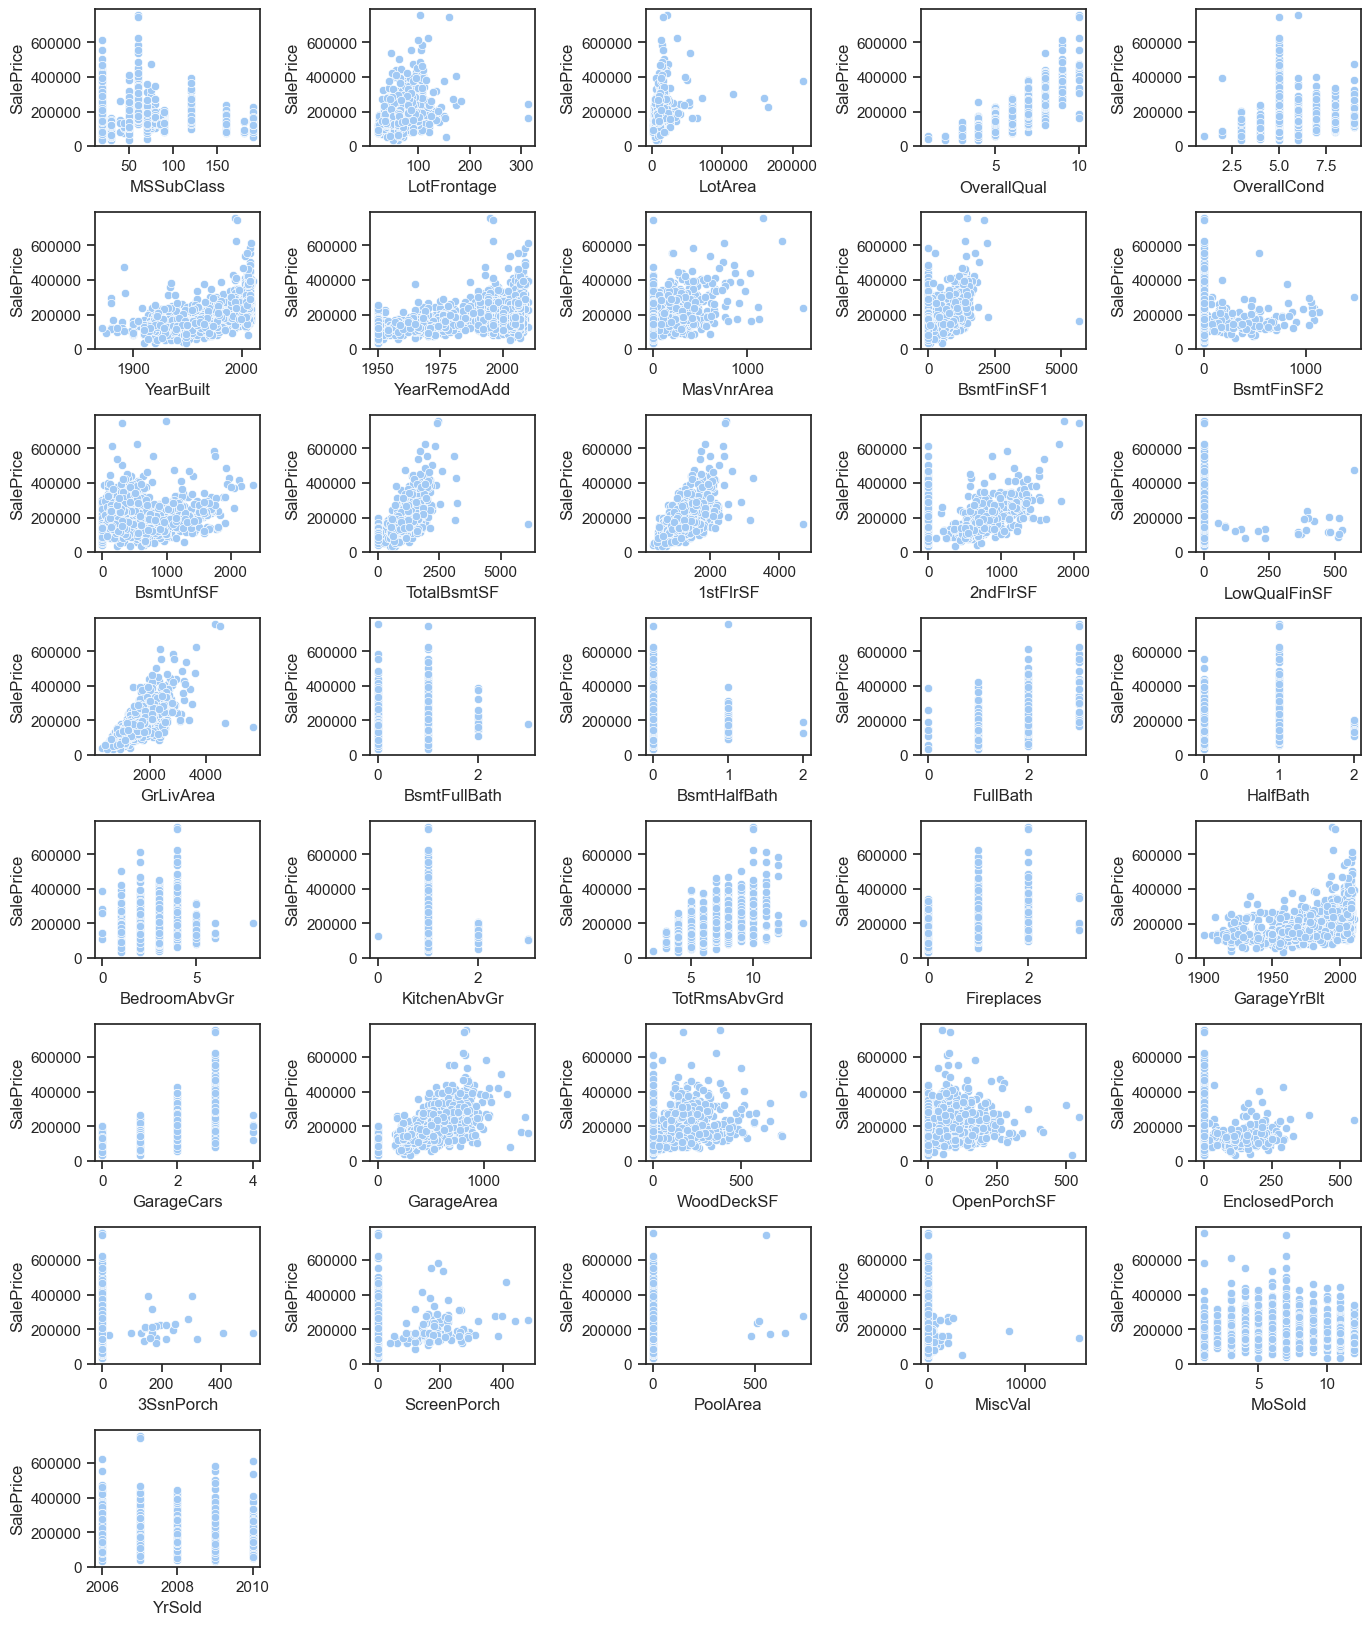

In [60]:
#Lets implement a scatter plot for each variable to understand the behavior with the SalePrice

fig = plt.figure(figsize=(14, 20))

SalePriceInfo = df_Data_Train.SalePrice

for i in range(len(numerical_atribute.columns)): 
    fig.add_subplot(10,5,i+1)
    sns.scatterplot(x=numerical_atribute.iloc[:,i], y=SalePriceInfo)
    

plt.tight_layout()
plt.show()

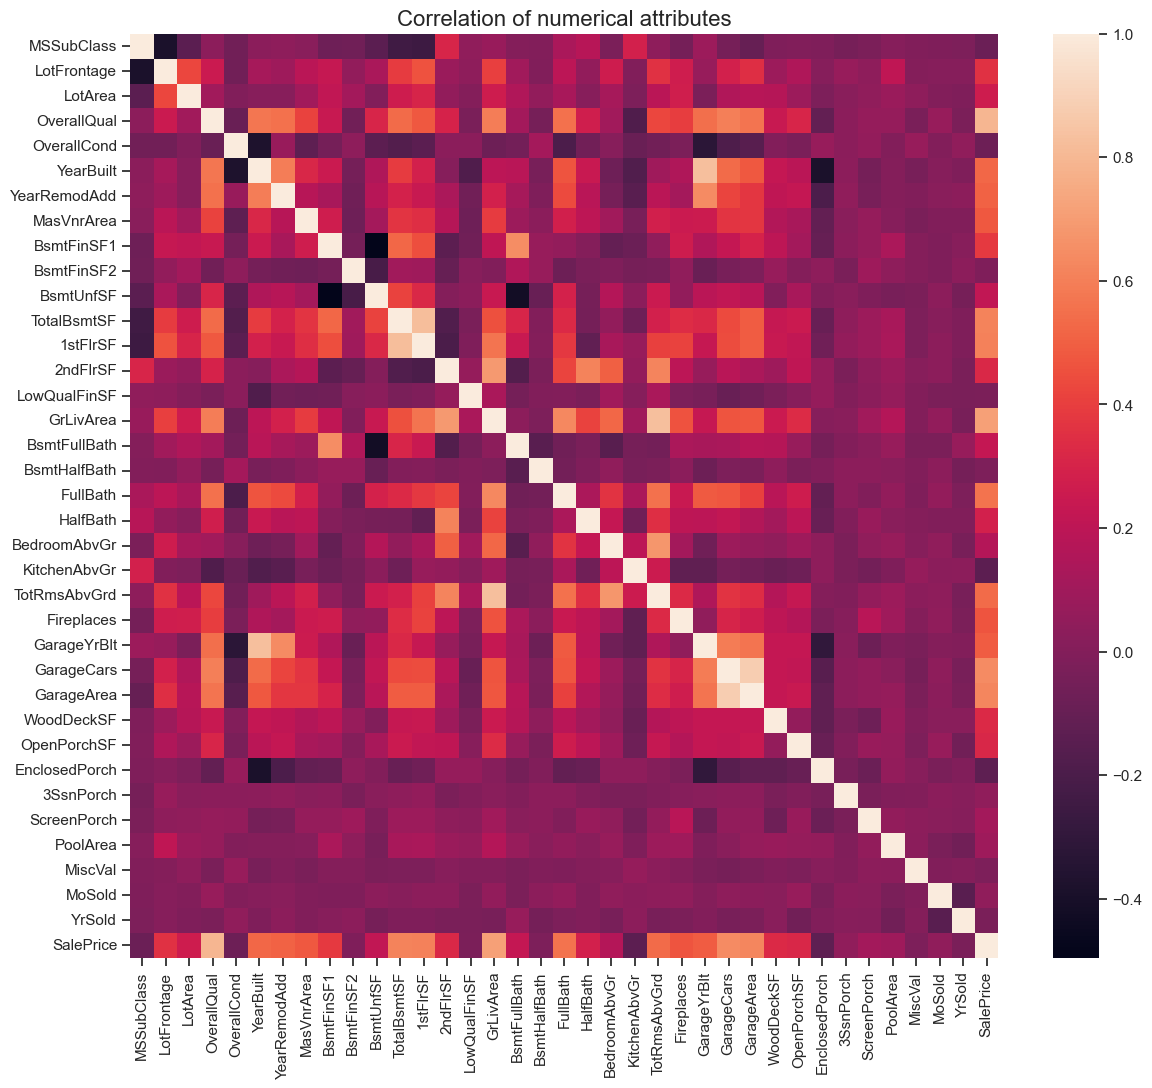

In [61]:
# a Pearson correlation to evaluate the level of relation of each variable with the SalePrice
numerical_atribute_withSalePrice = df_Data_Train.select_dtypes(exclude='object').drop(['Id'], axis = 1).copy()

correlation = numerical_atribute_withSalePrice.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()


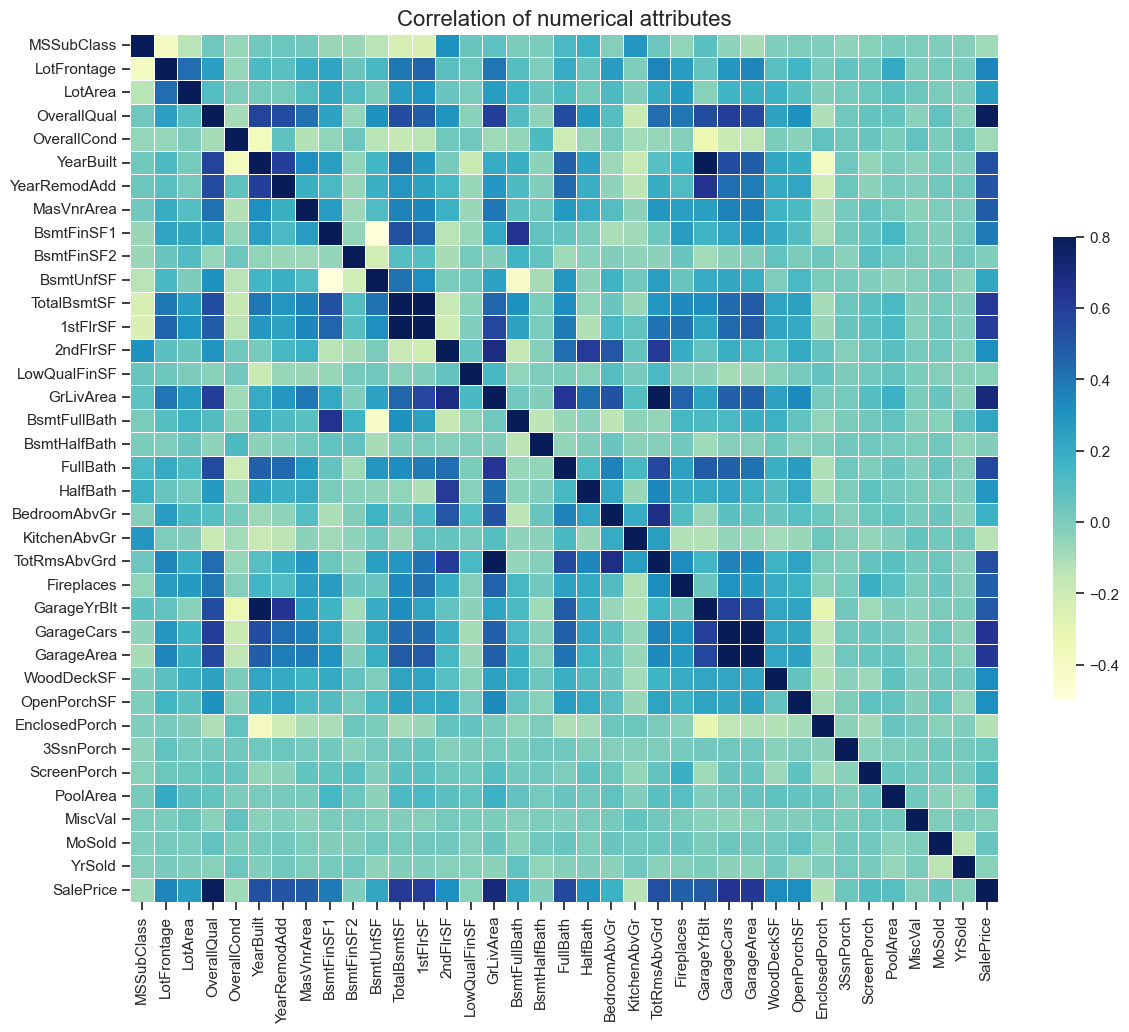

In [62]:
numerical_atribute_withSalePrice = df_Data_Train.select_dtypes(exclude='object').drop(['Id'], axis = 1).copy()

correlation = numerical_atribute_withSalePrice.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation, vmax=.8, square=True, cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [63]:
#for loop to evaluate the correlation with the SalePrice

for ind, value in correlation['SalePrice'].items():
    if value > 0.5 or value < -0.5: 
        print(f"Key: {ind}, Value: {round(value,3)}")
    

Key: OverallQual, Value: 0.791
Key: YearBuilt, Value: 0.523
Key: YearRemodAdd, Value: 0.507
Key: TotalBsmtSF, Value: 0.614
Key: 1stFlrSF, Value: 0.606
Key: GrLivArea, Value: 0.709
Key: FullBath, Value: 0.561
Key: TotRmsAbvGrd, Value: 0.534
Key: GarageCars, Value: 0.64
Key: GarageArea, Value: 0.623
Key: SalePrice, Value: 1.0


In [71]:
pd.set_option('display.max_columns', None)
category_columns = df_Data_Train.select_dtypes(include='object')
category_columns.head()
category_columns = df_Data_Train.select_dtypes(include='object')
category_columns.isna().sum().sort_values(ascending=False)




PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

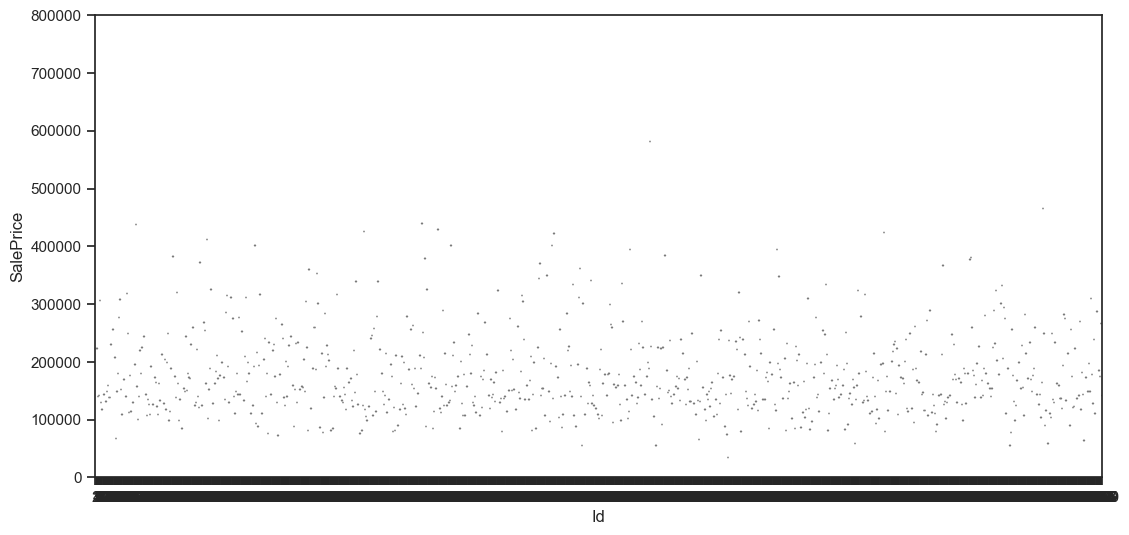

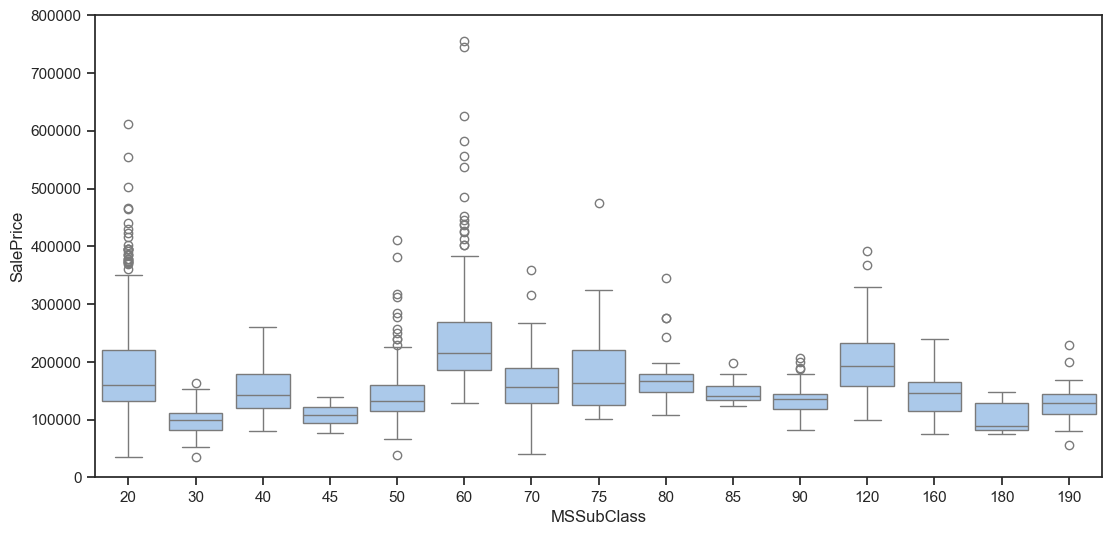

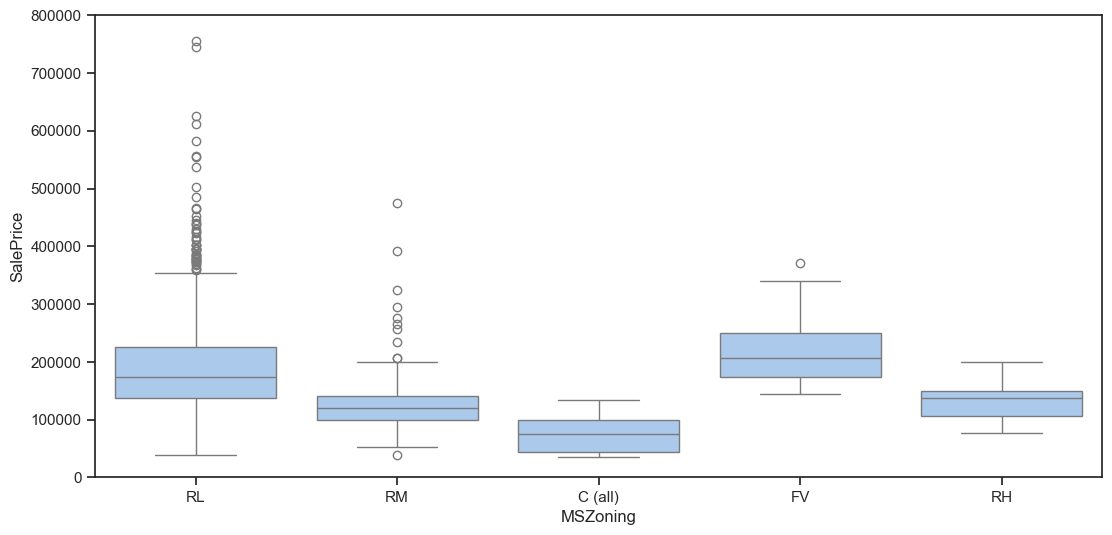

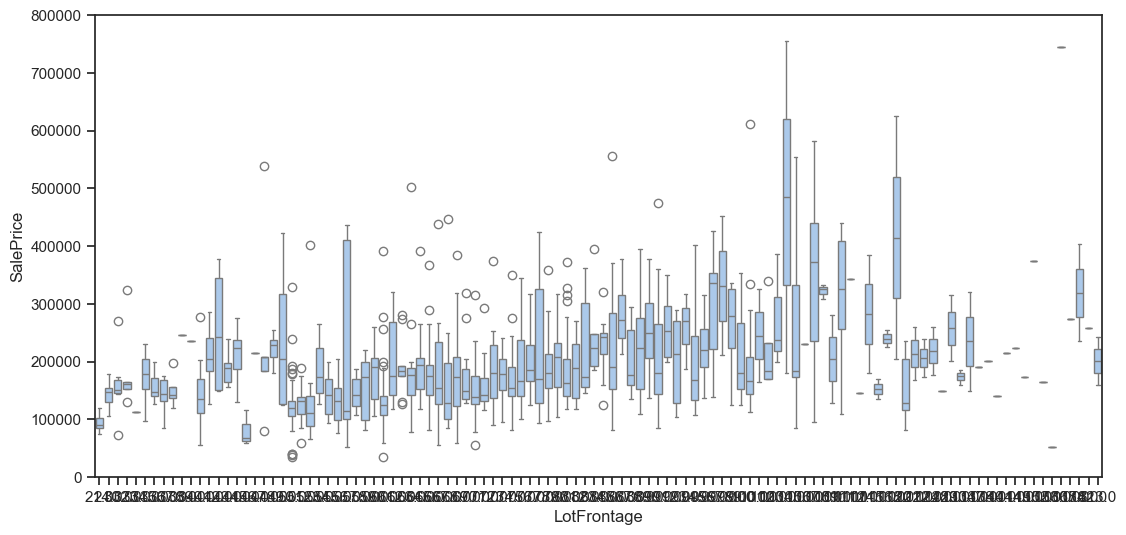

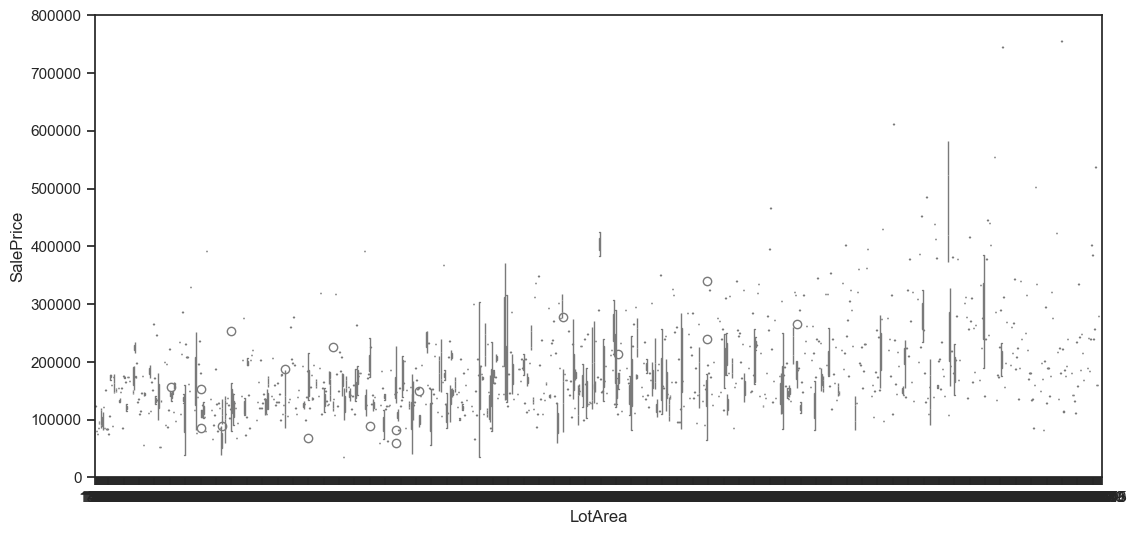

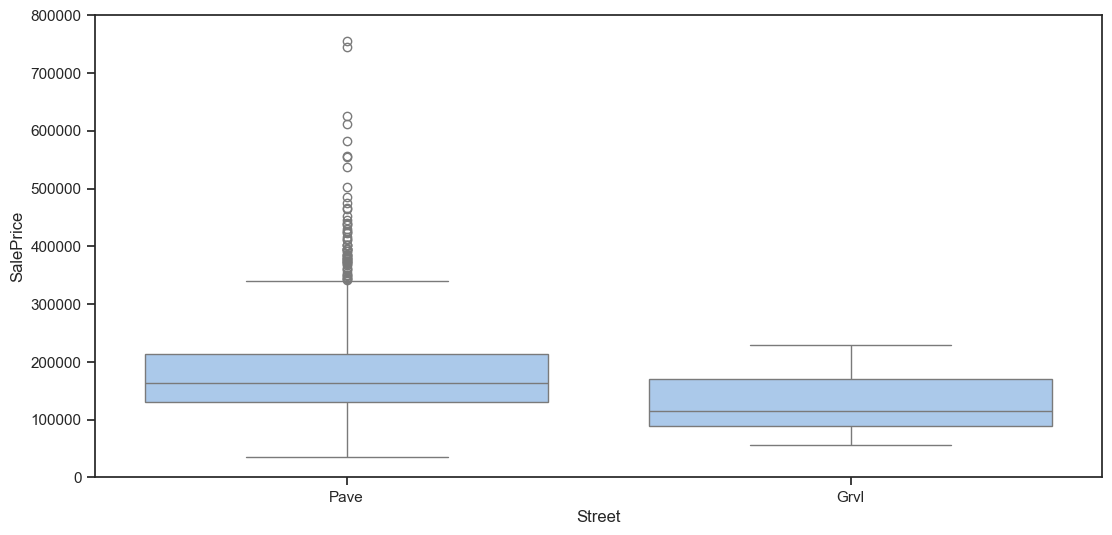

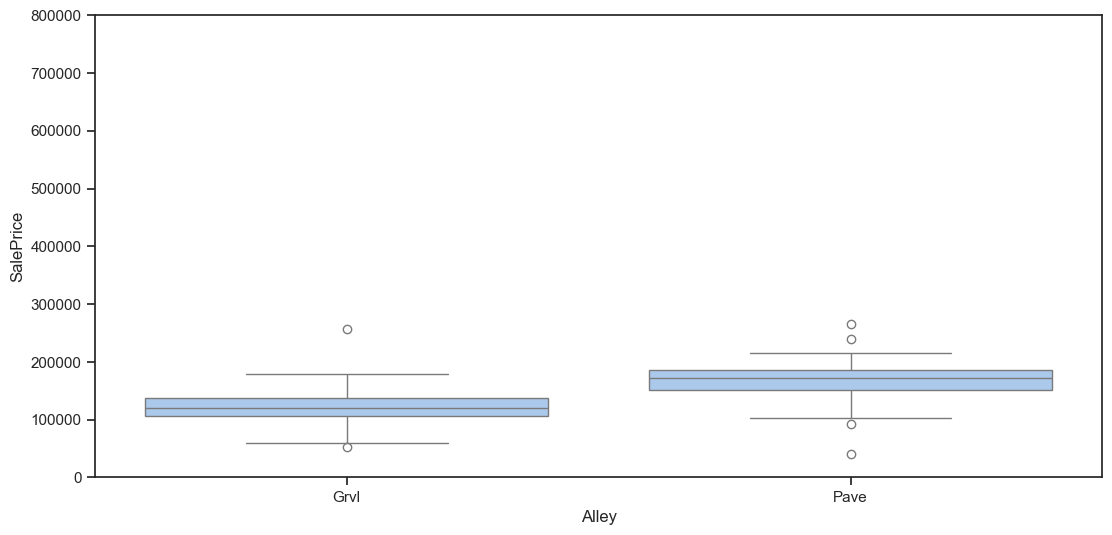

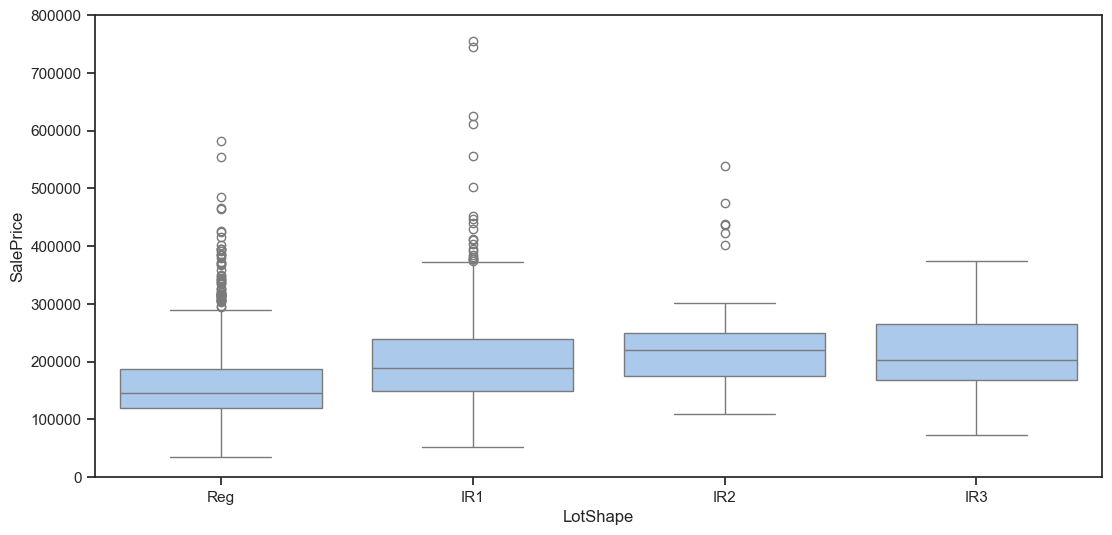

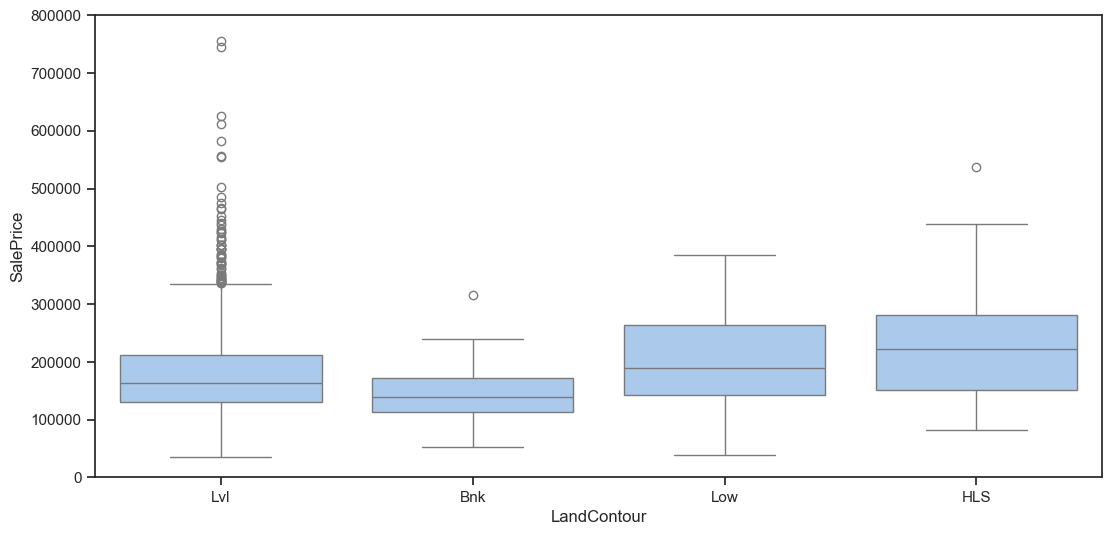

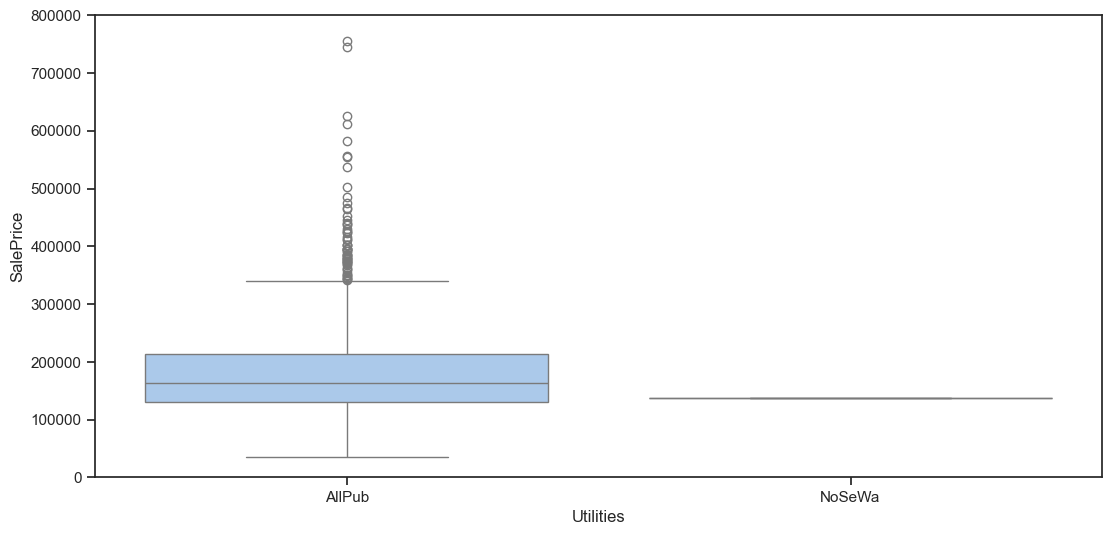

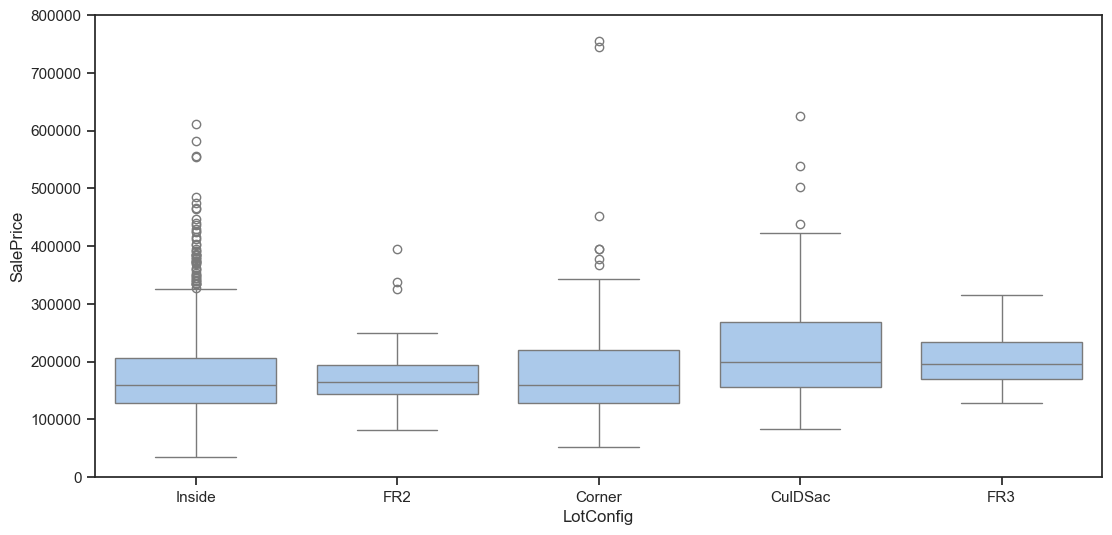

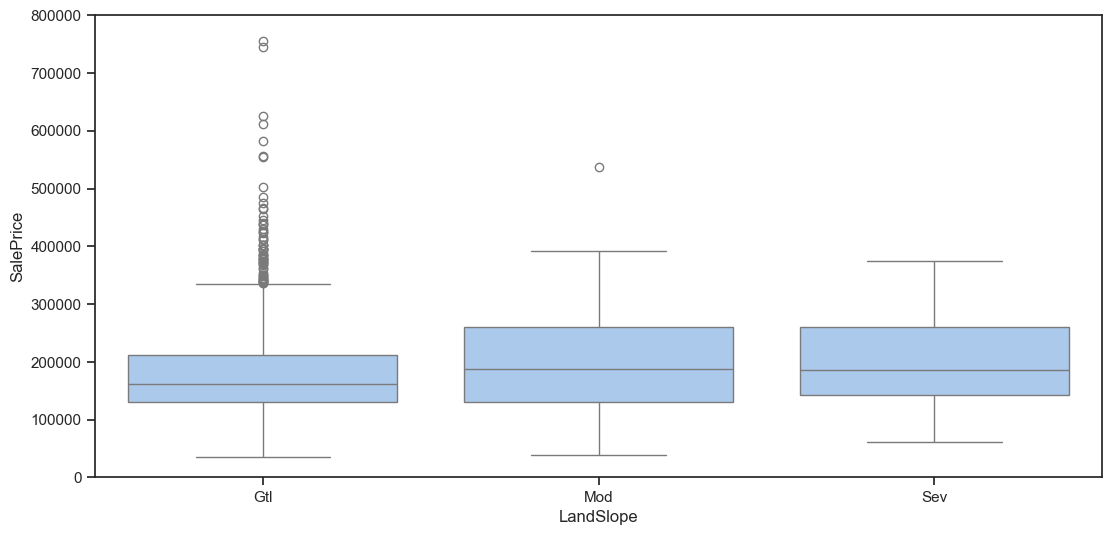

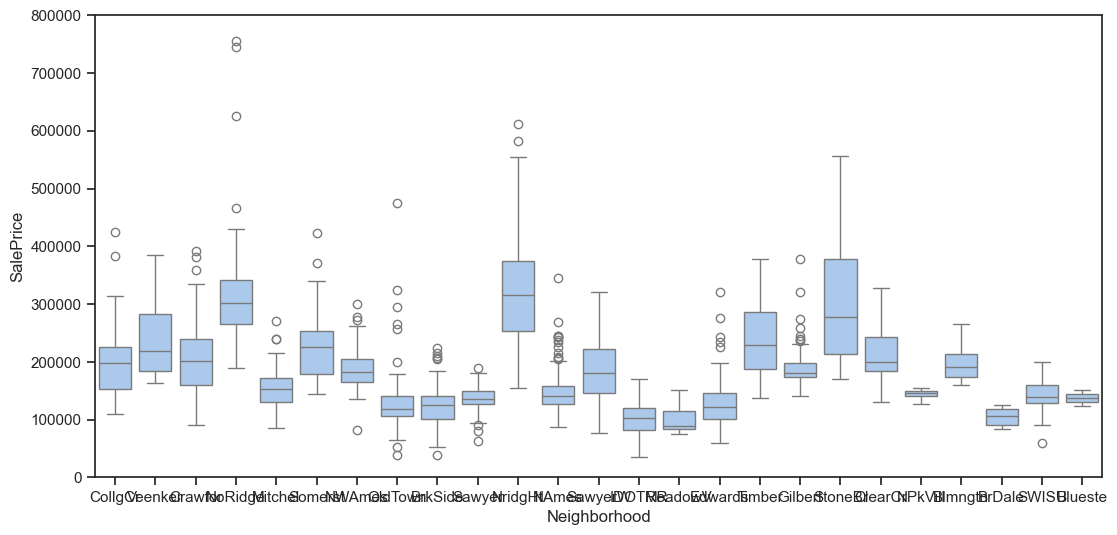

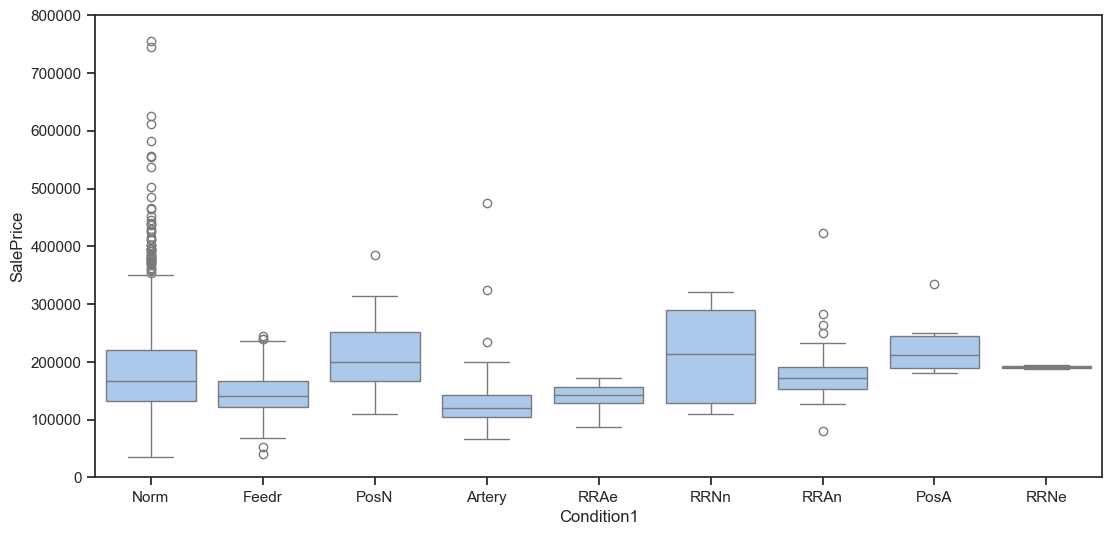

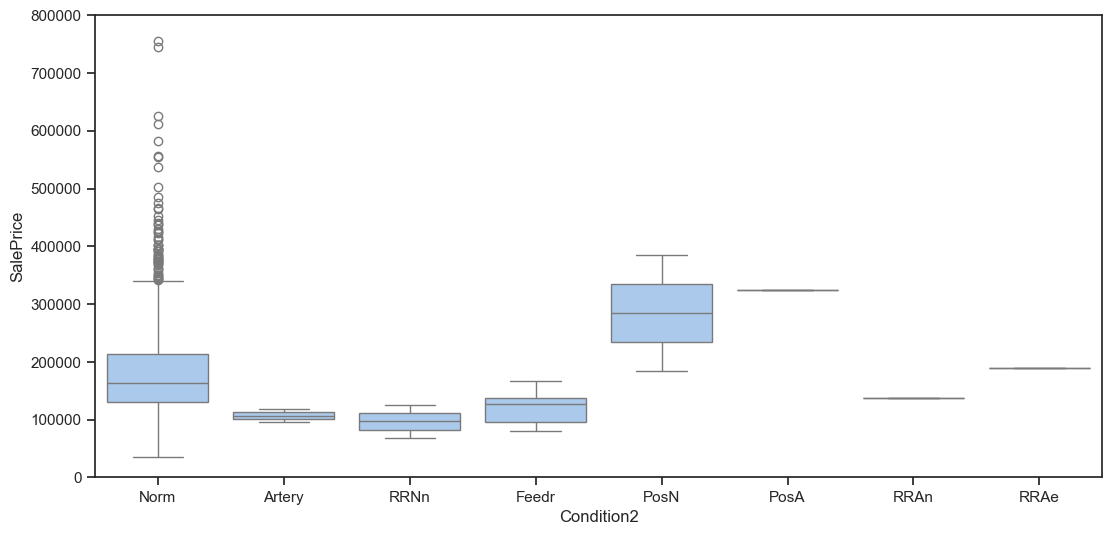

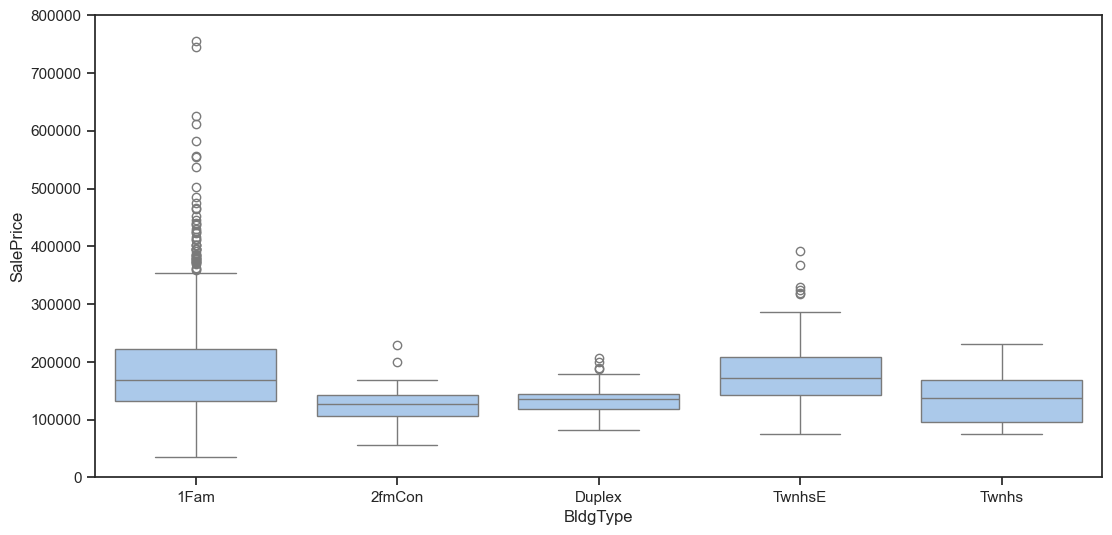

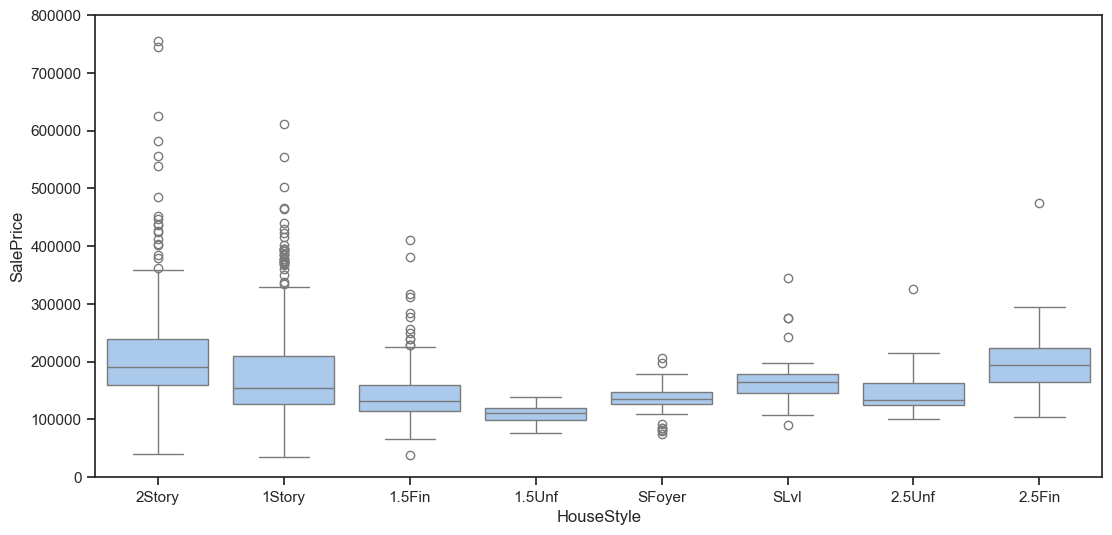

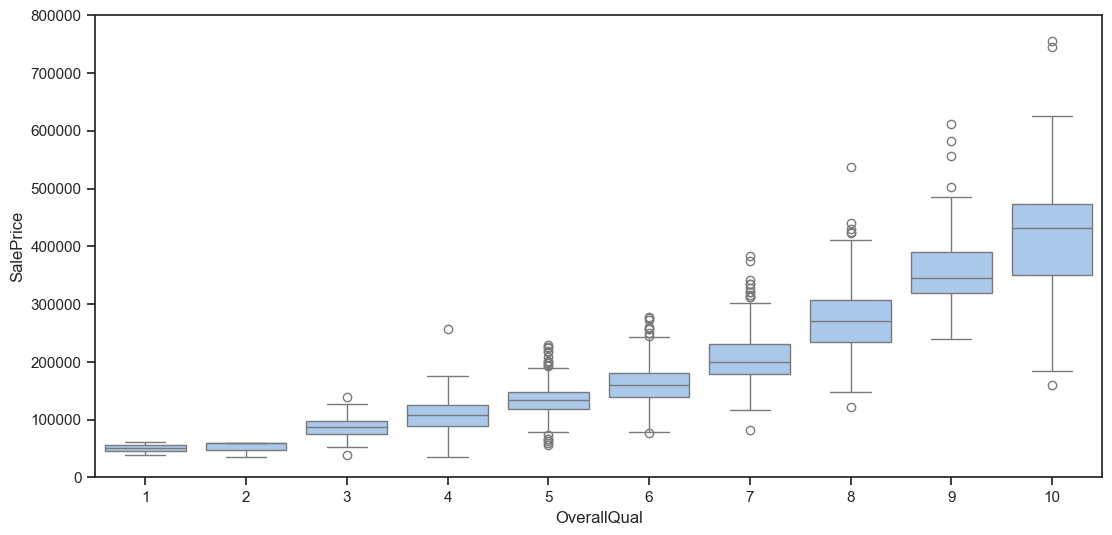

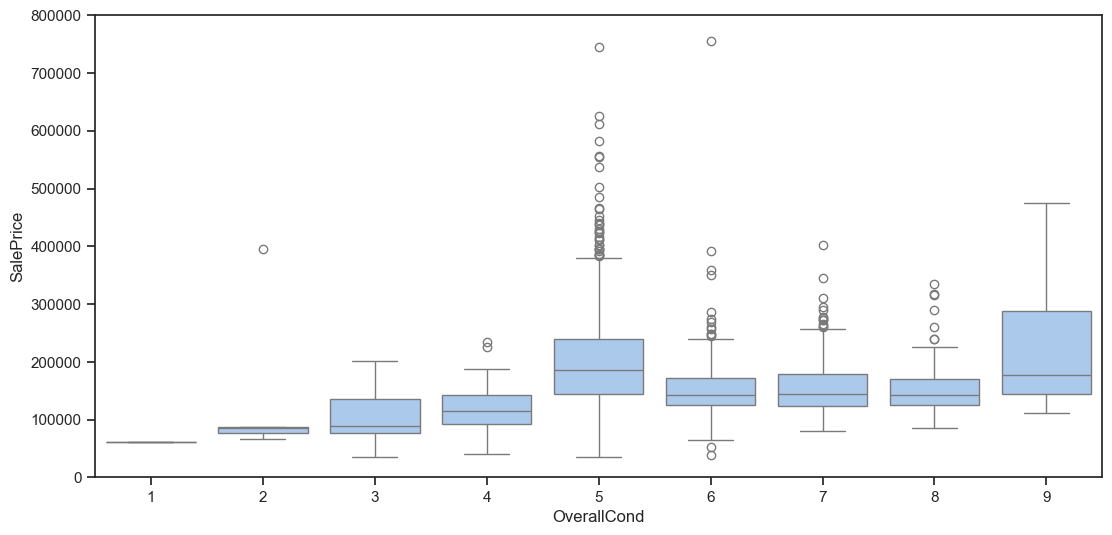

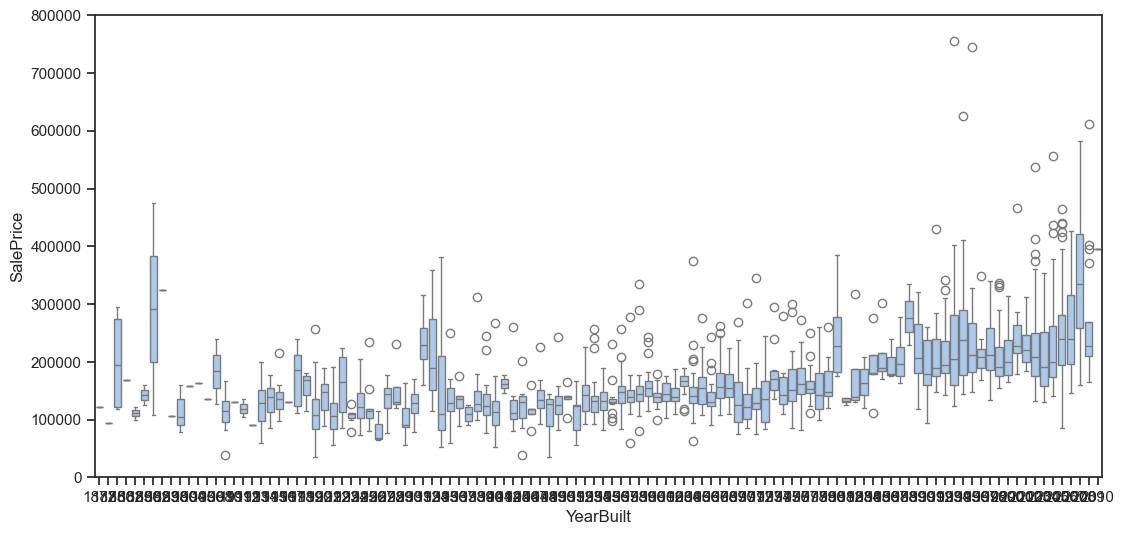

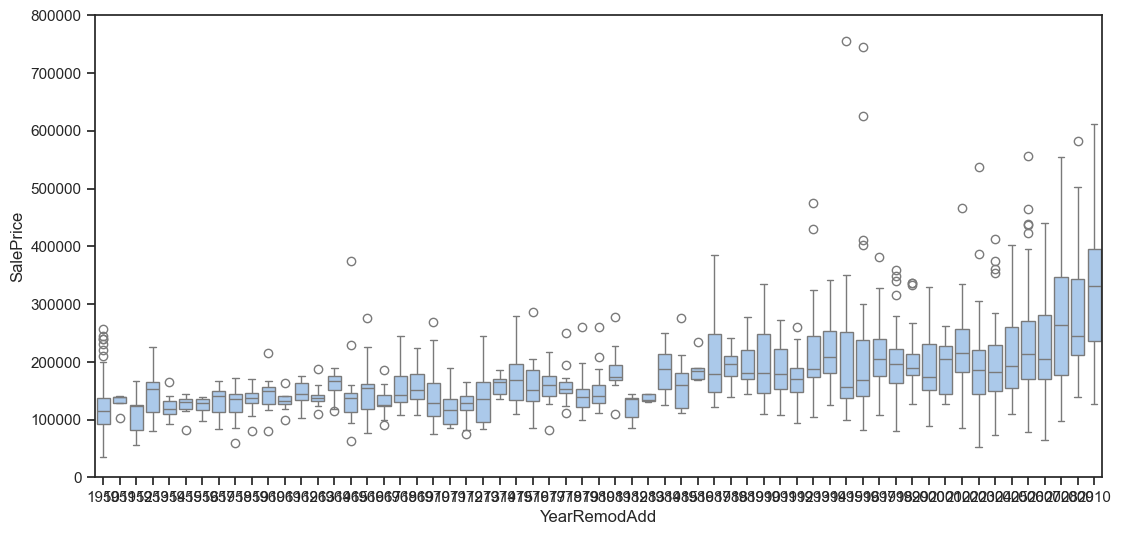

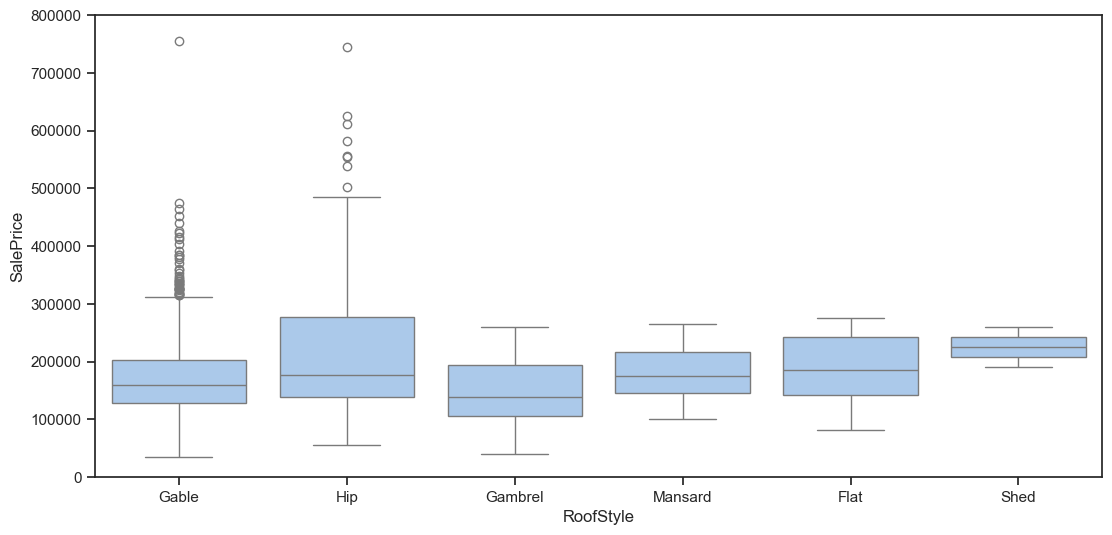

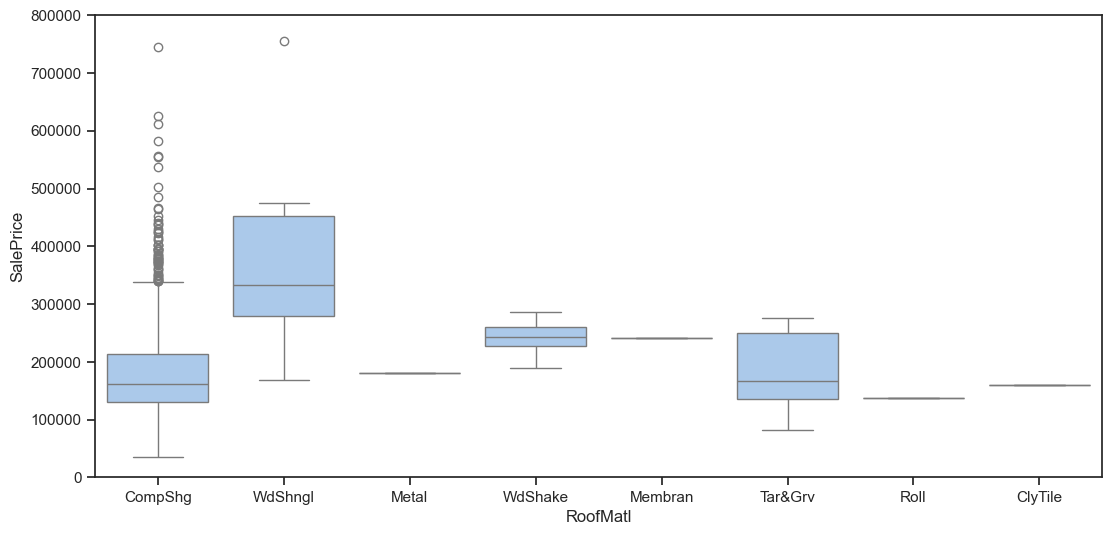

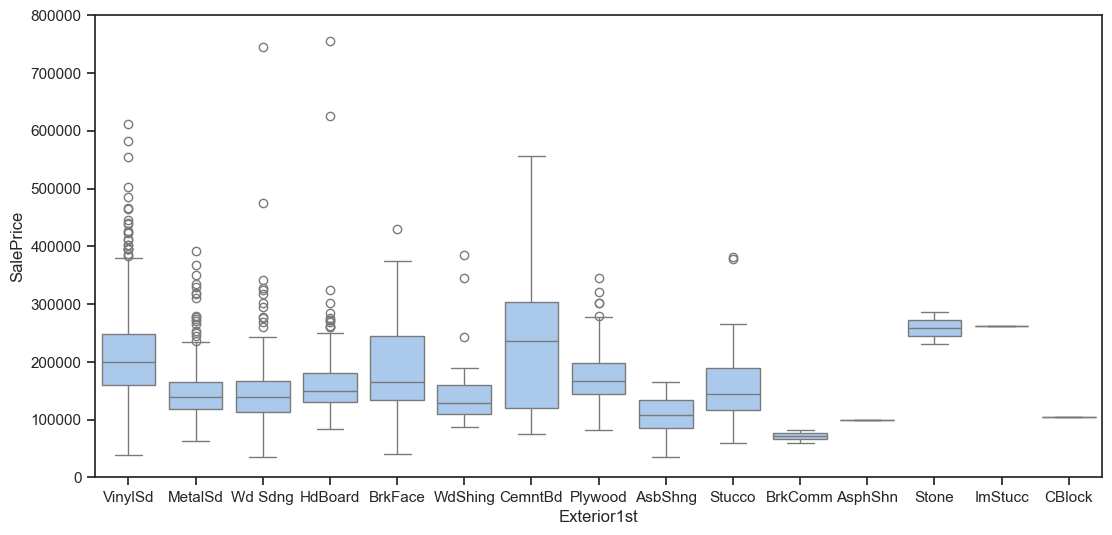

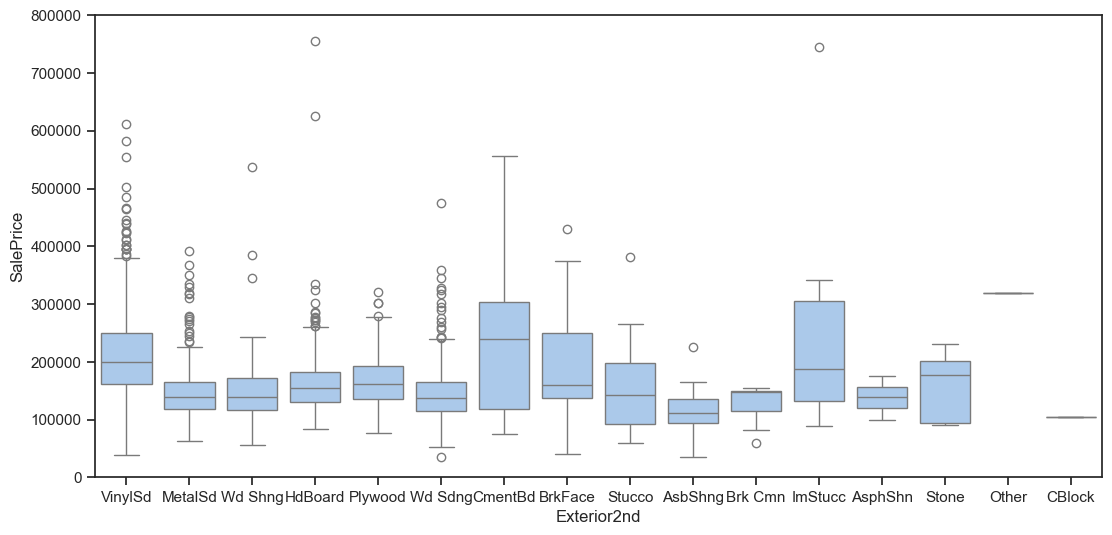

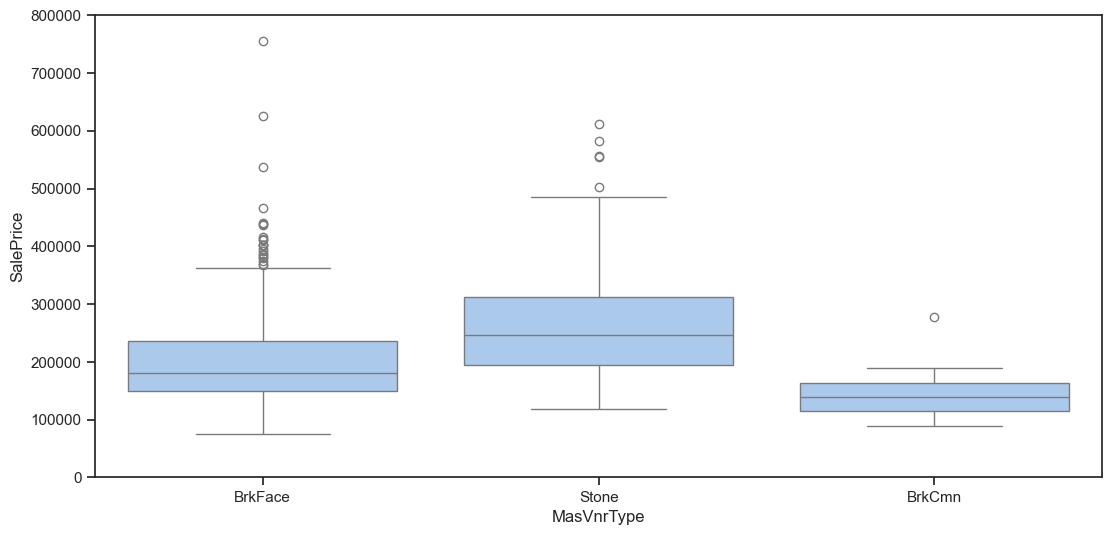

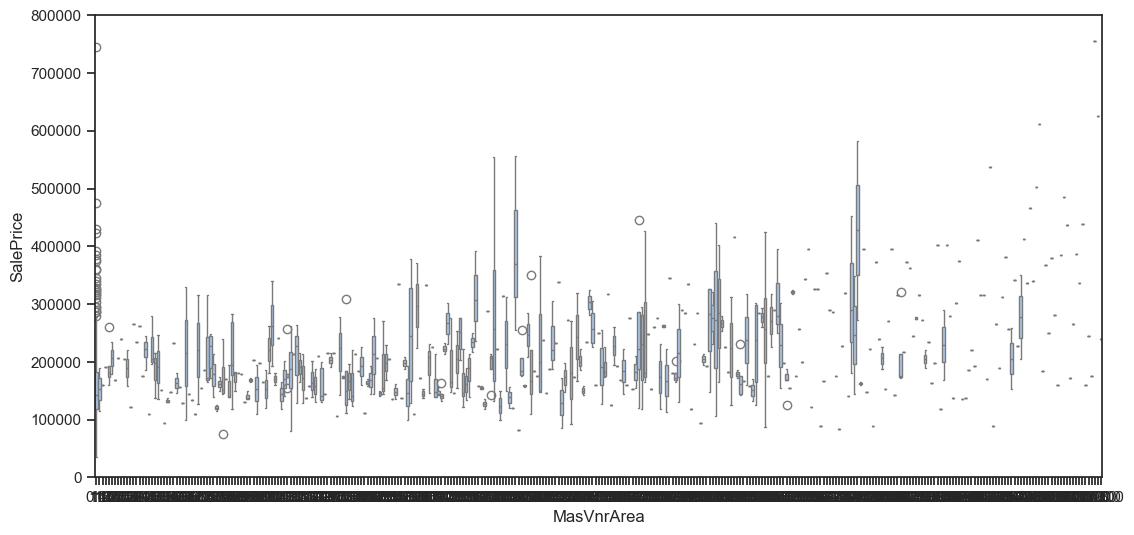

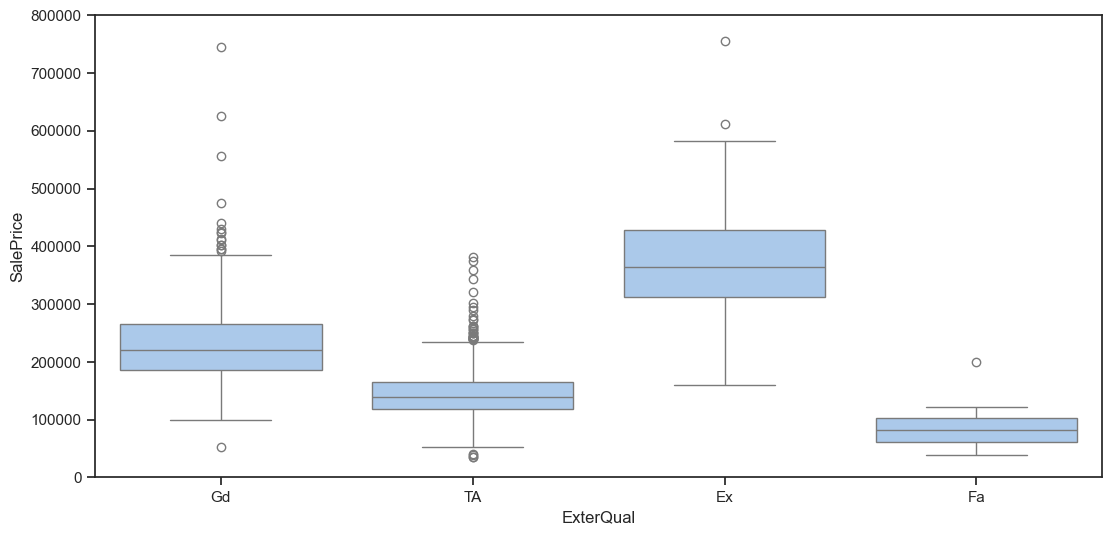

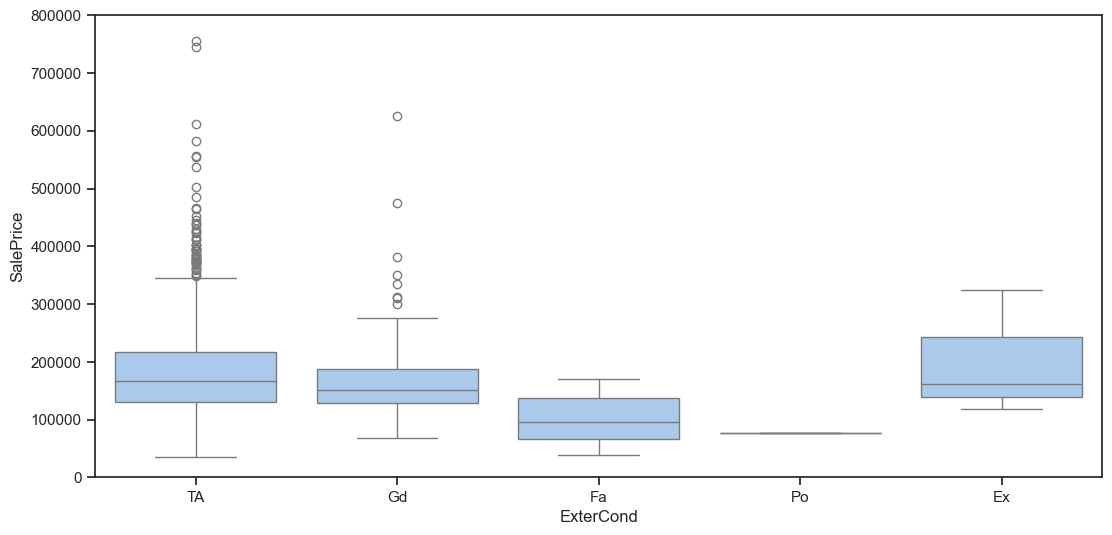

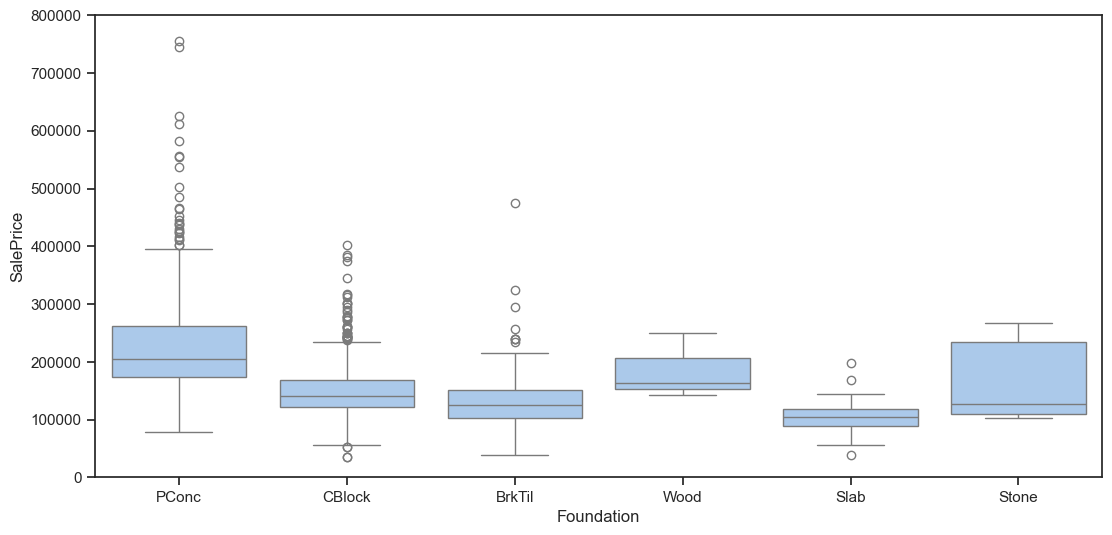

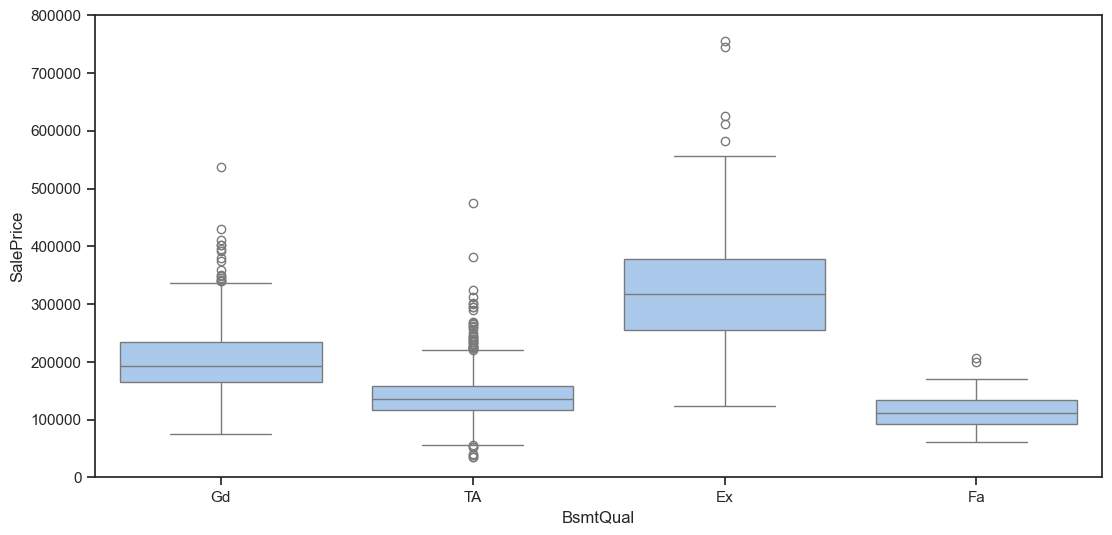

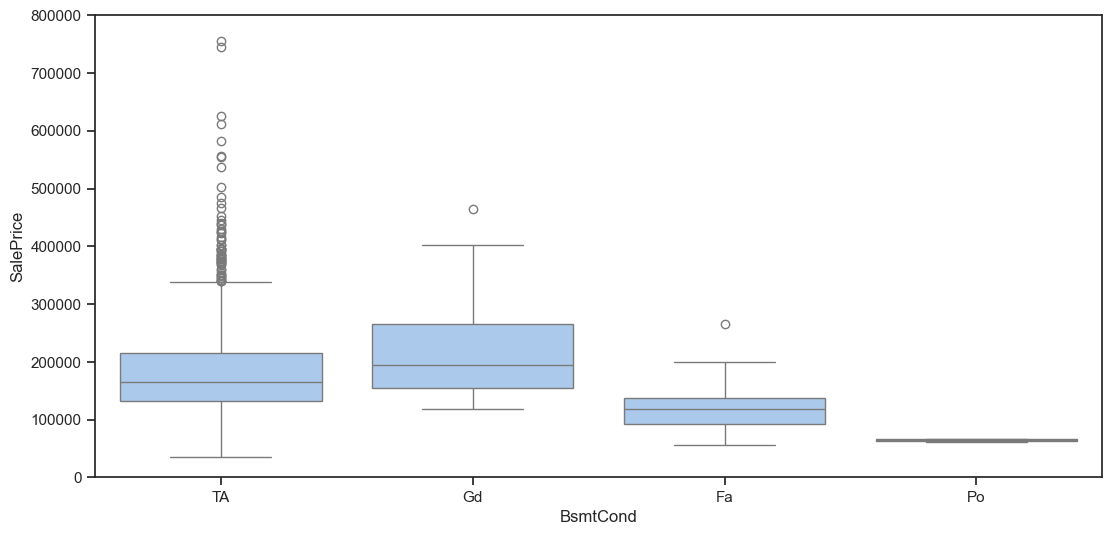

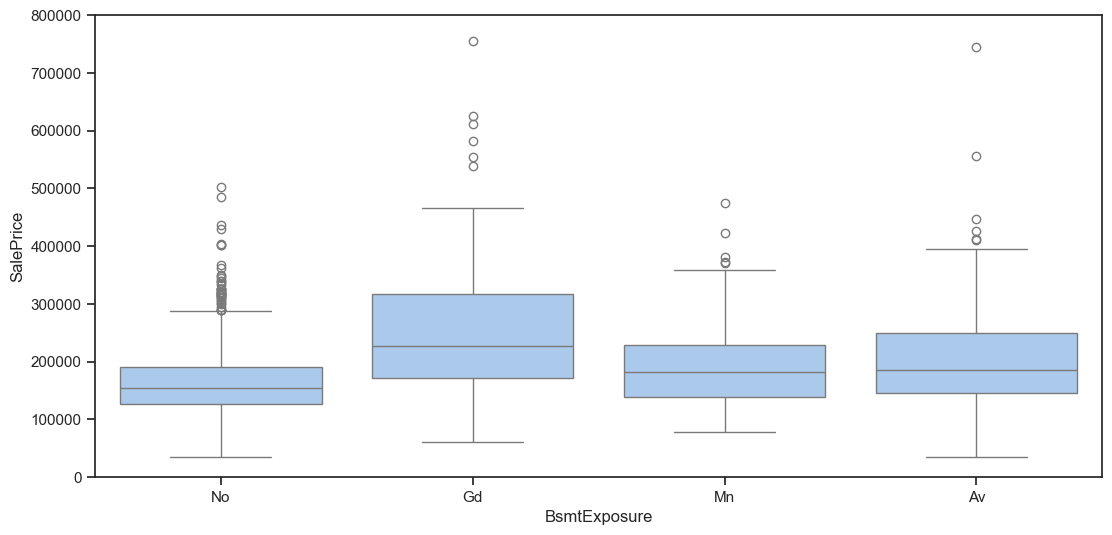

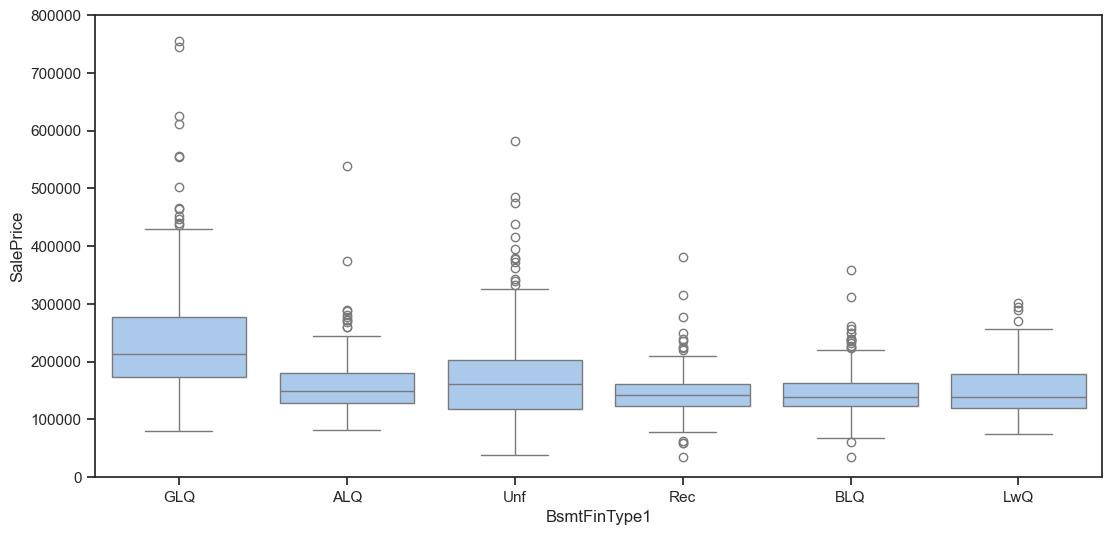

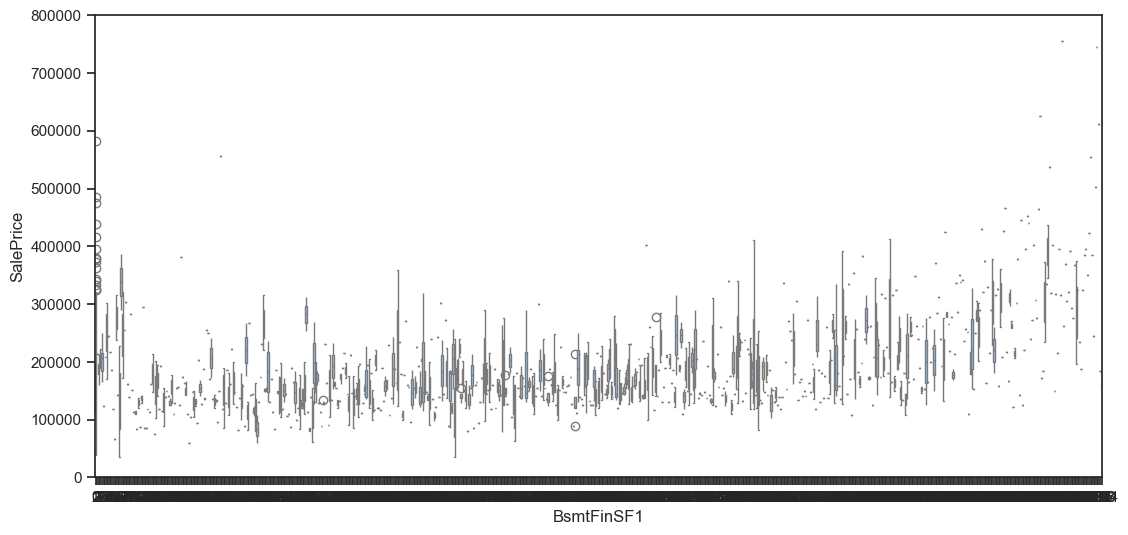

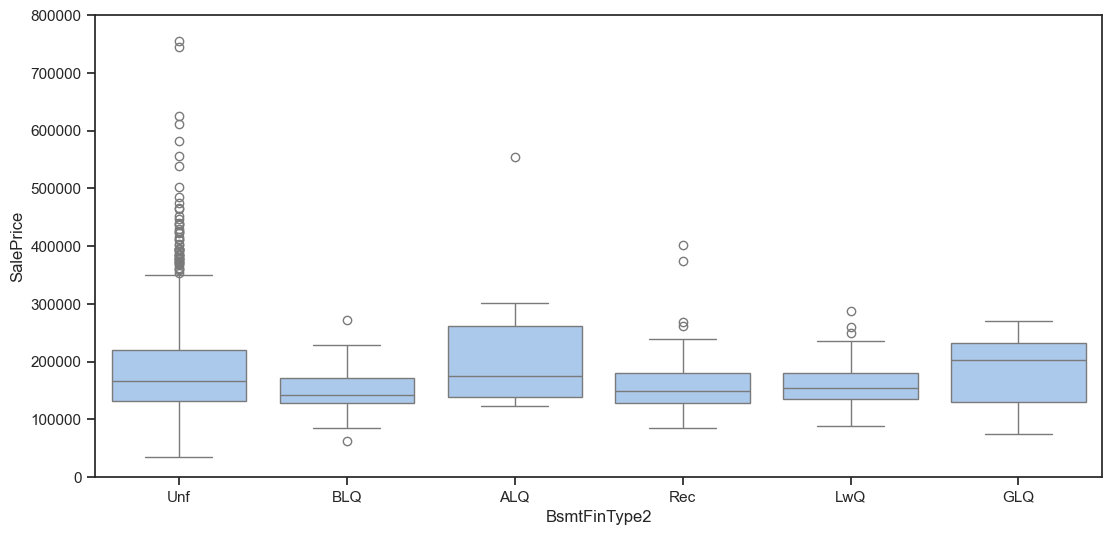

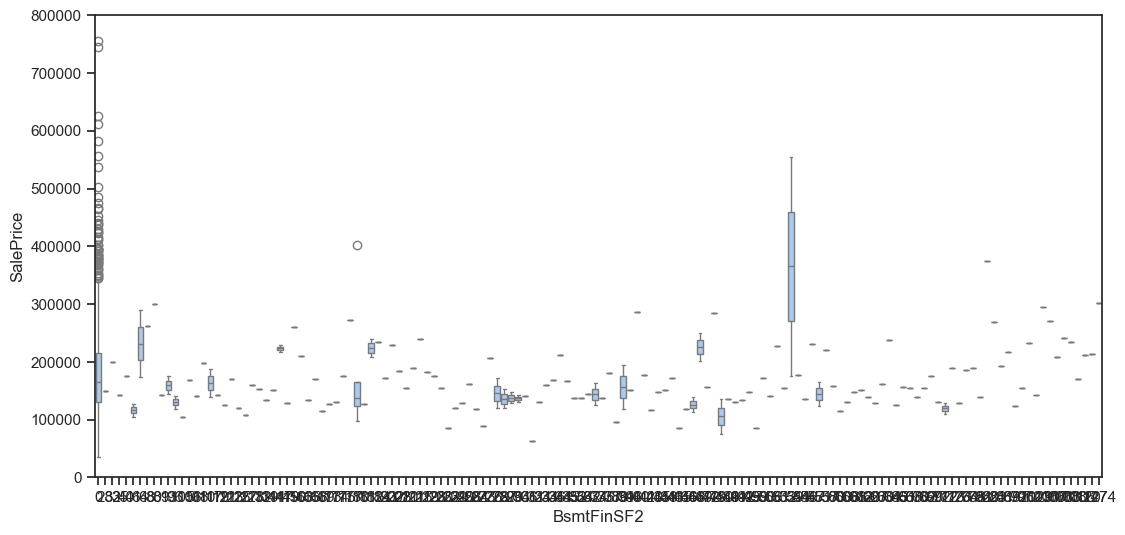

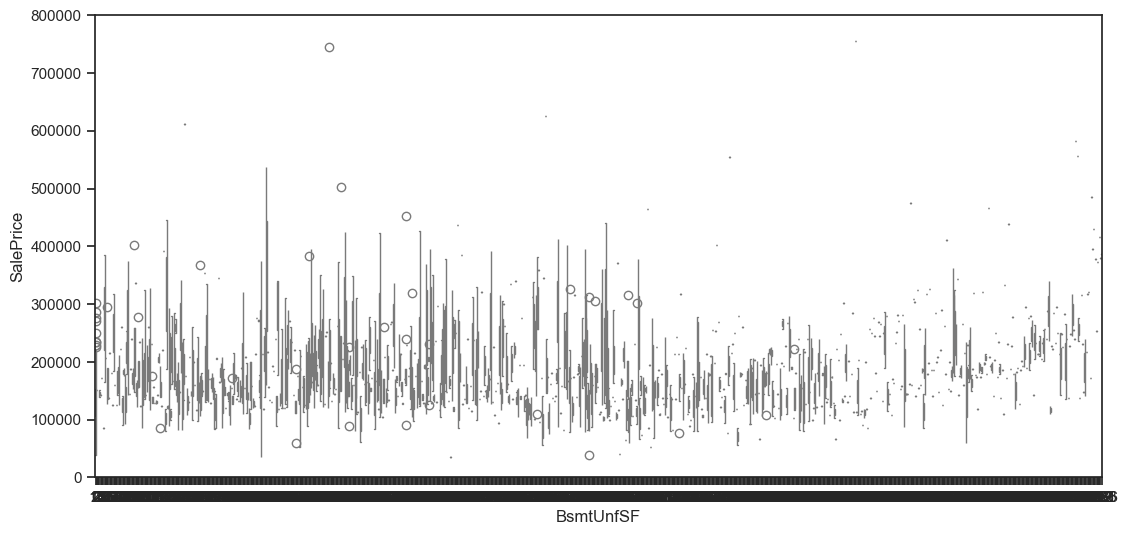

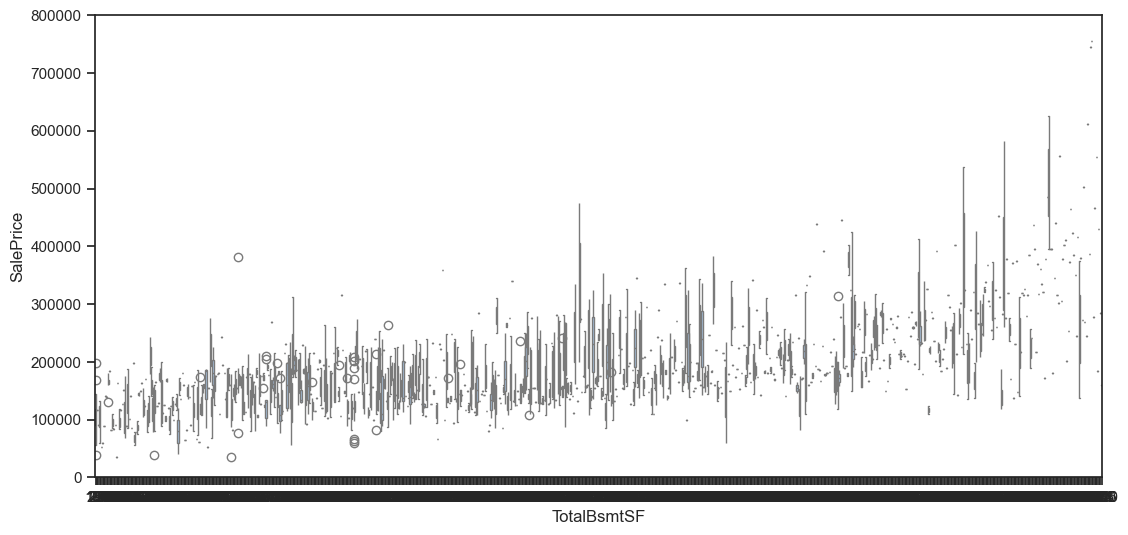

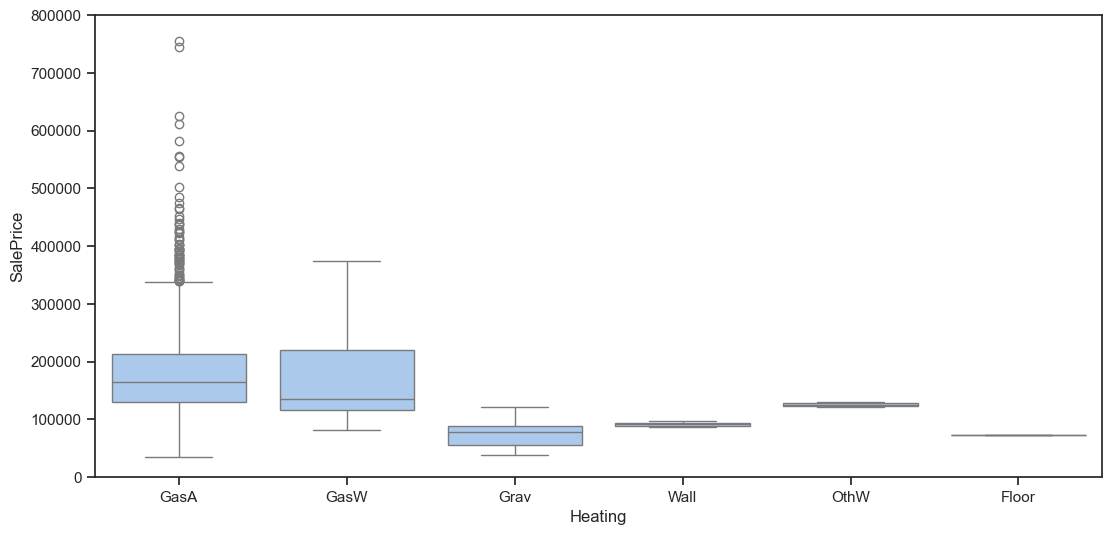

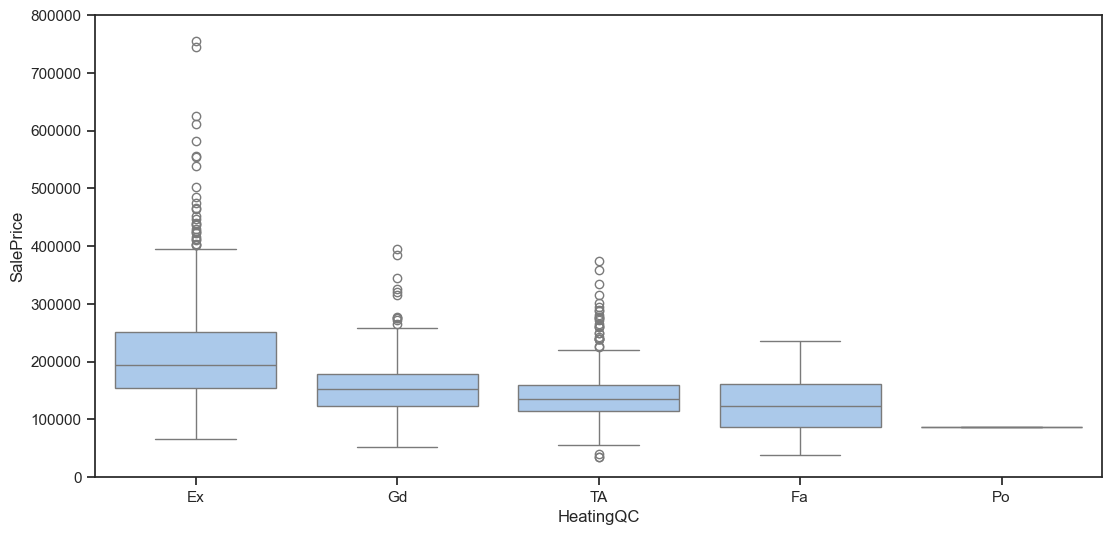

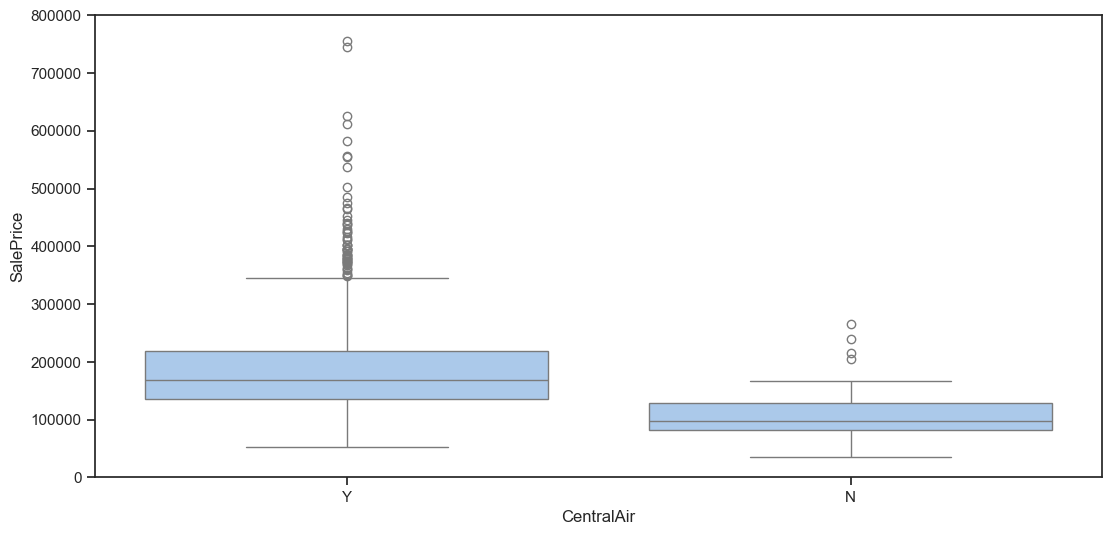

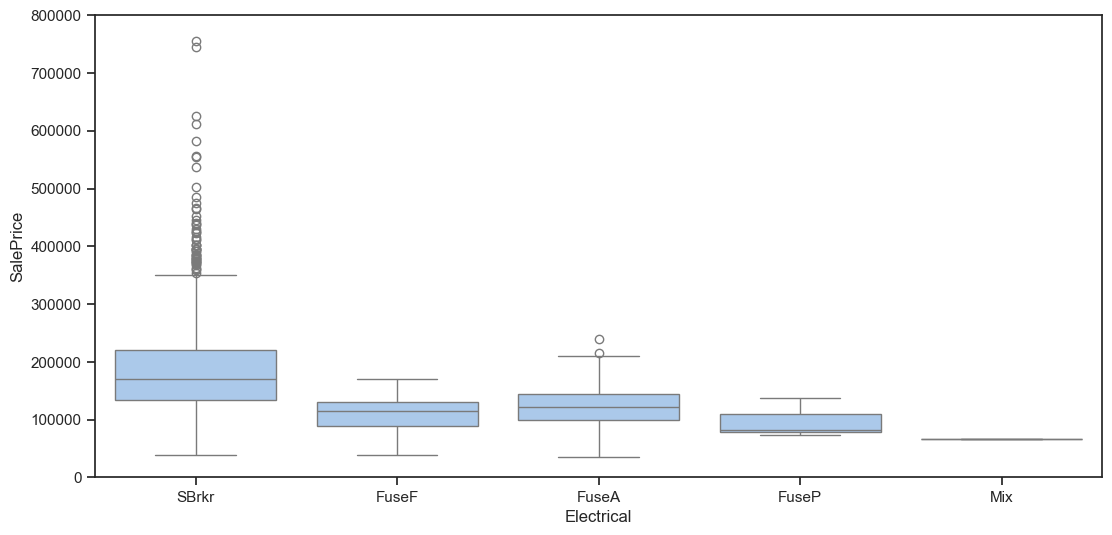

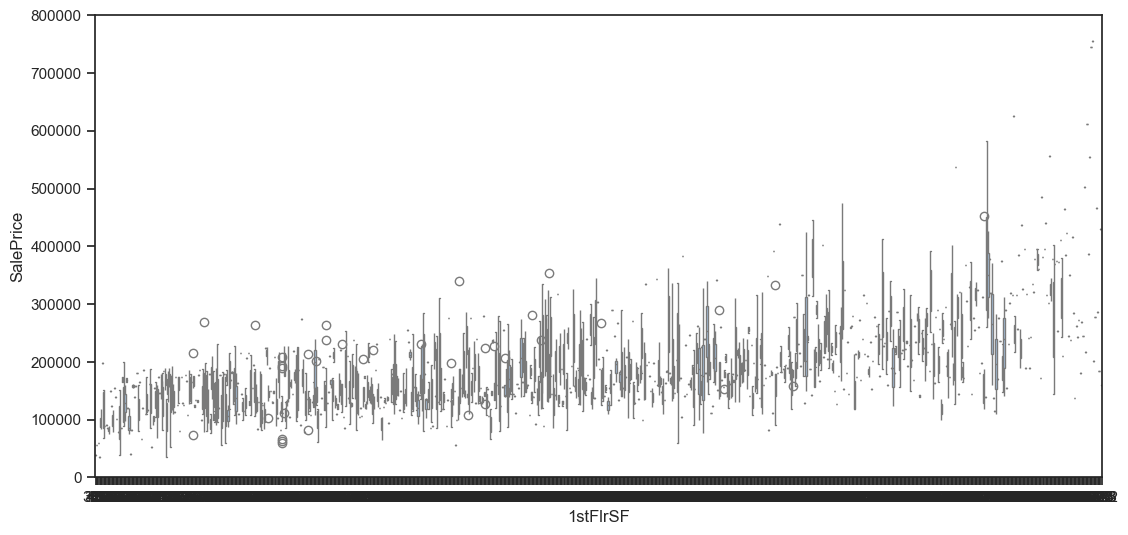

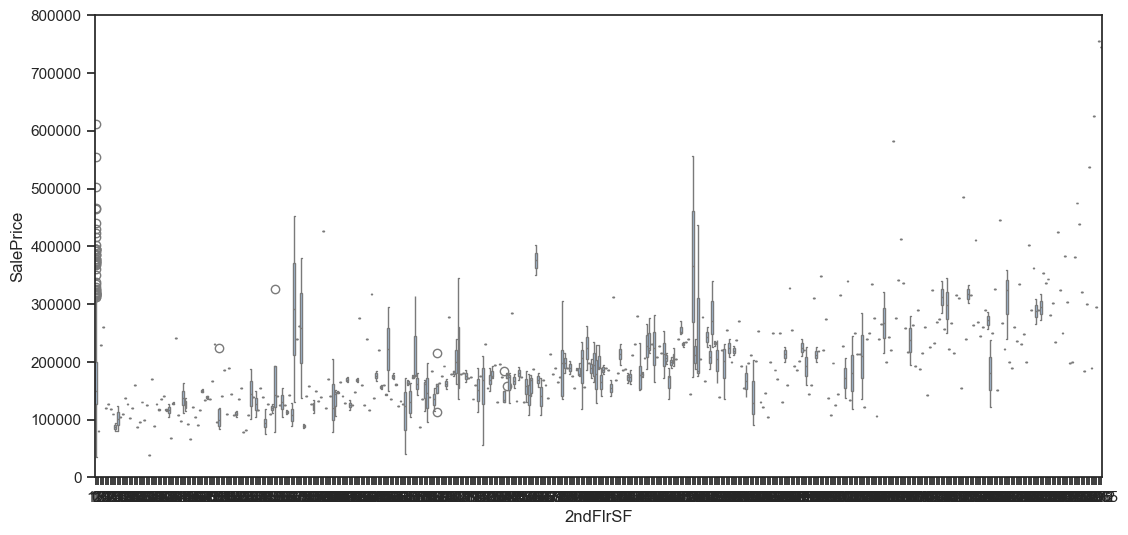

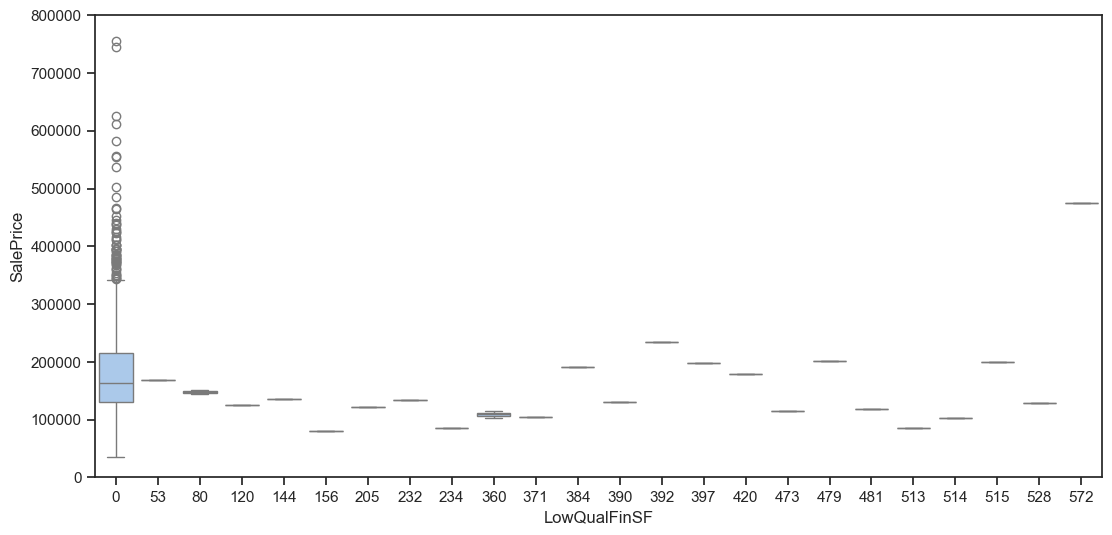

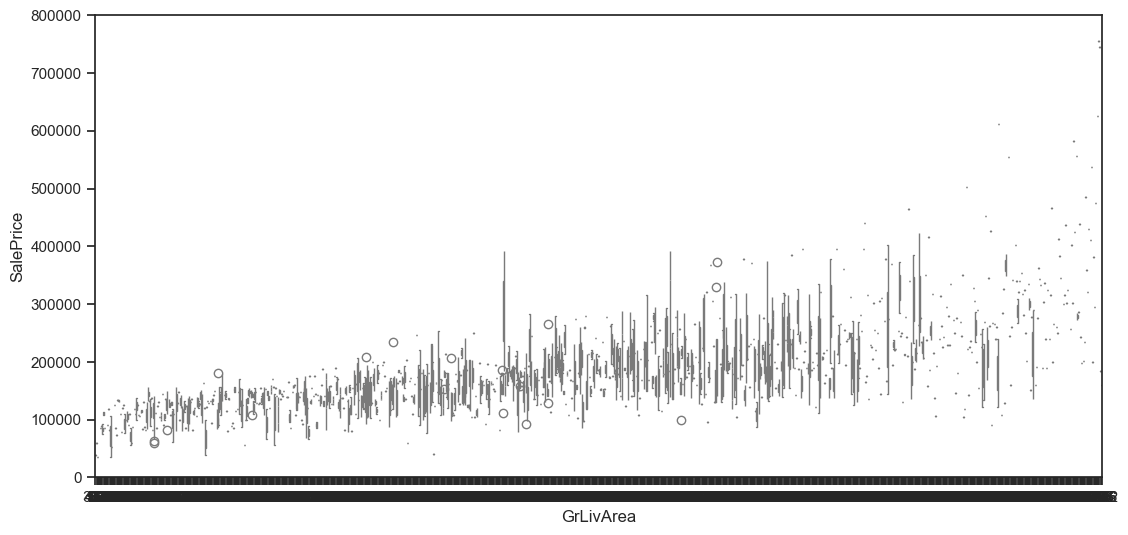

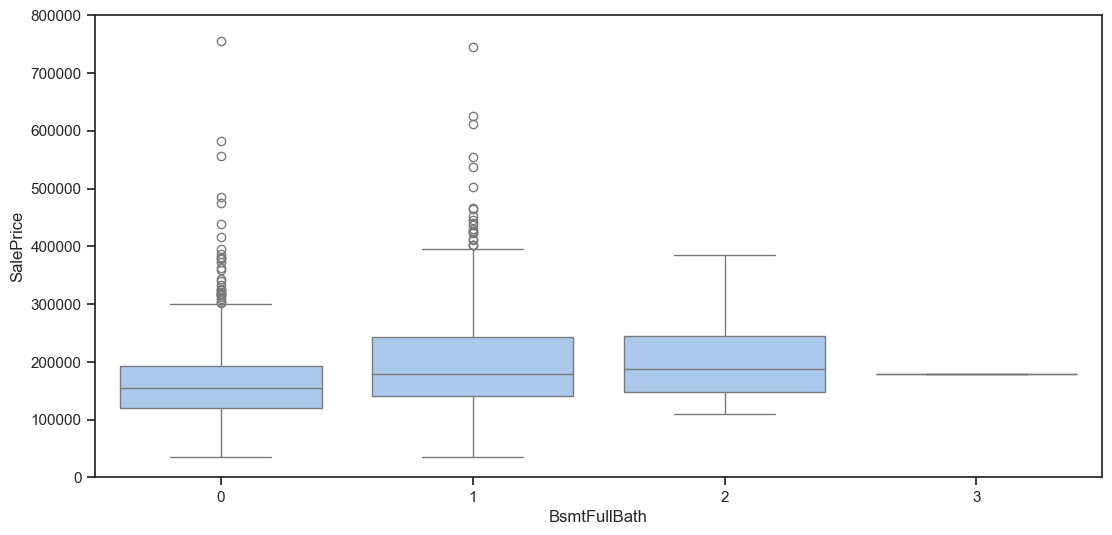

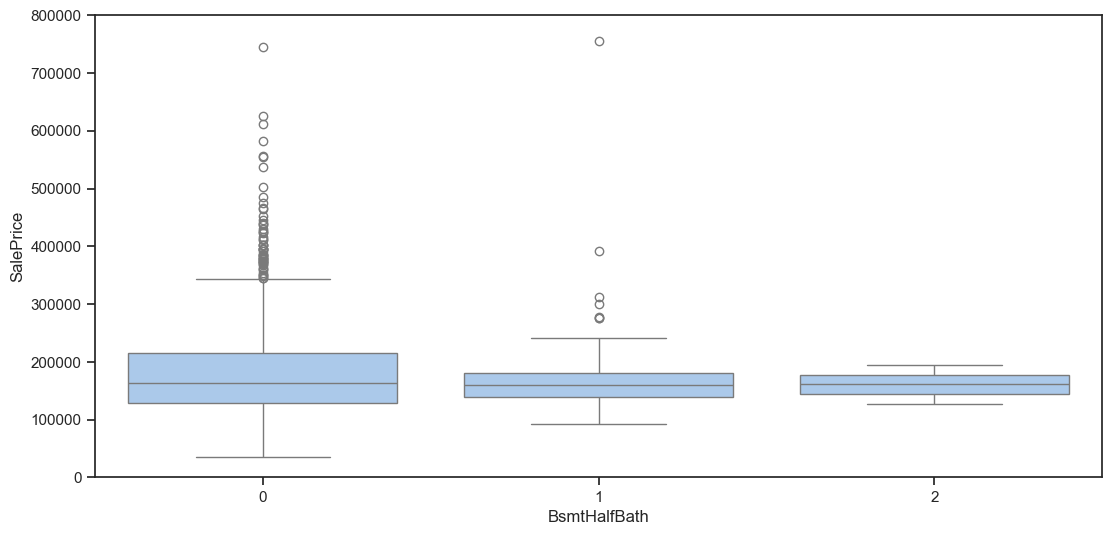

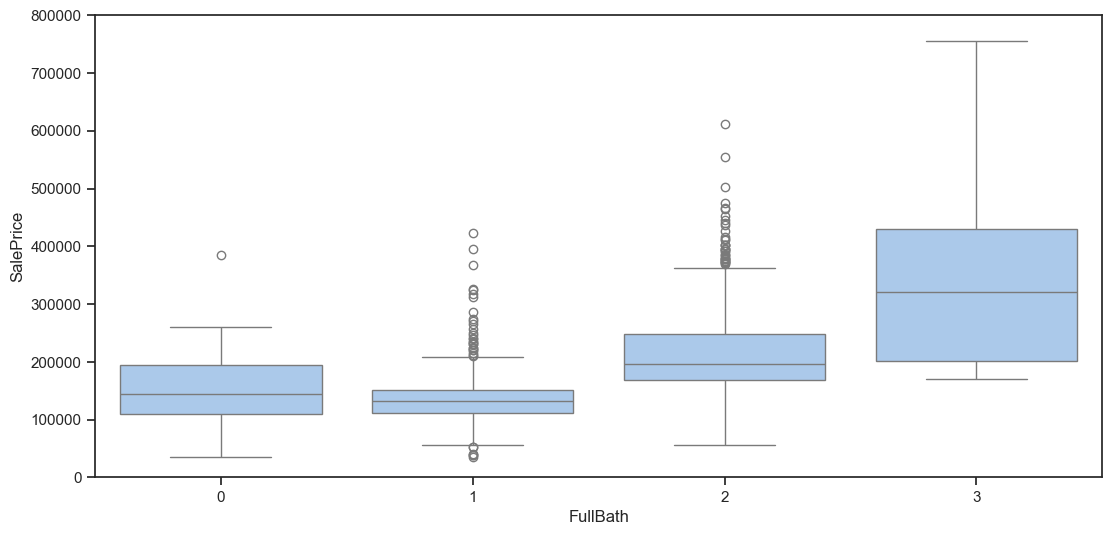

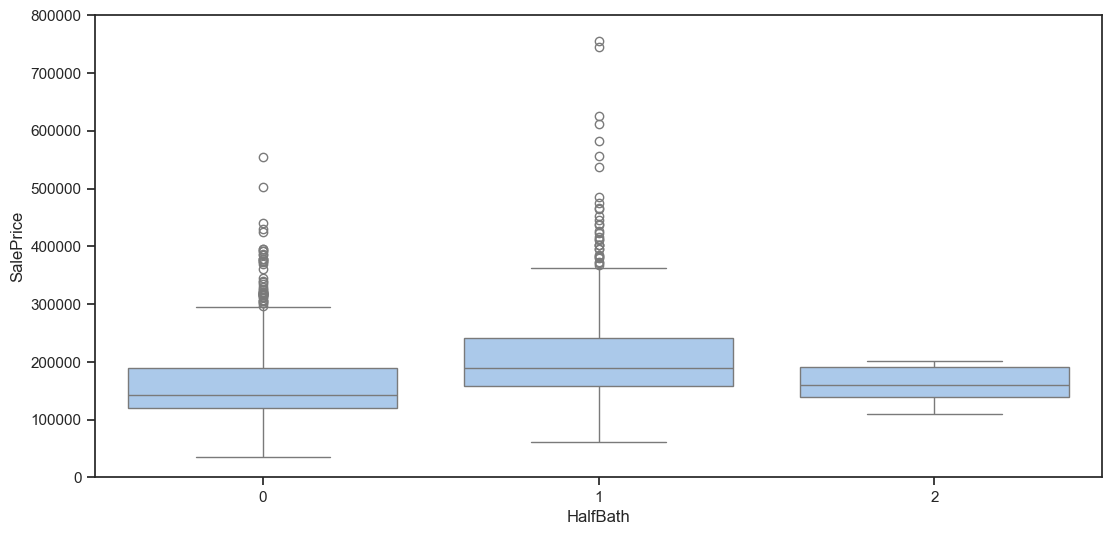

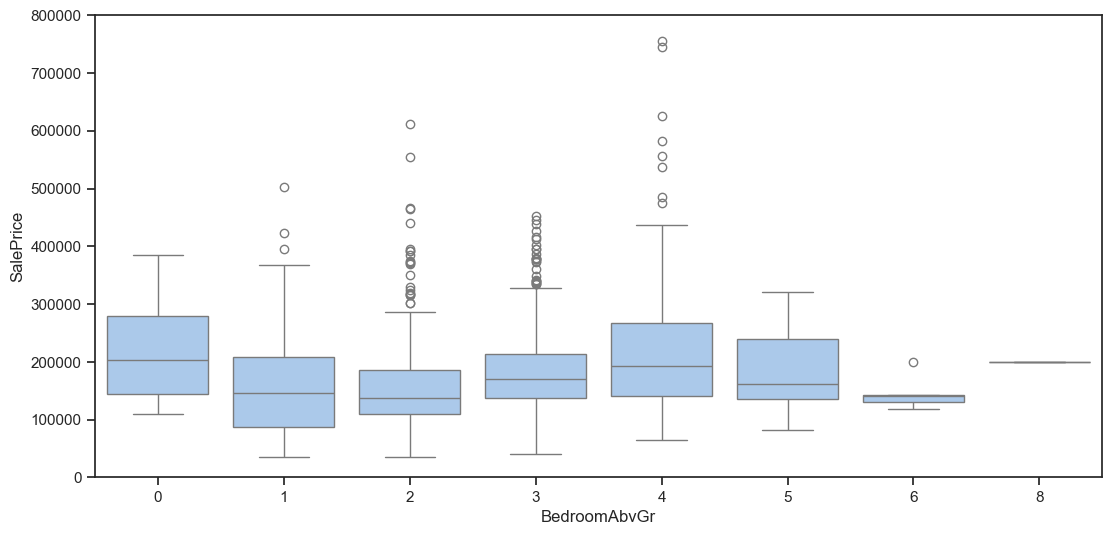

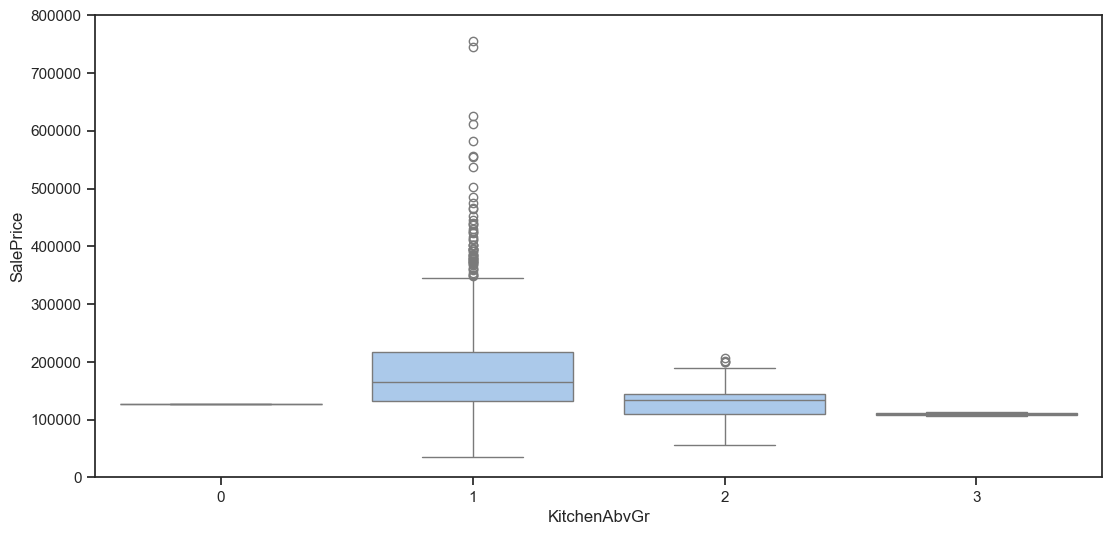

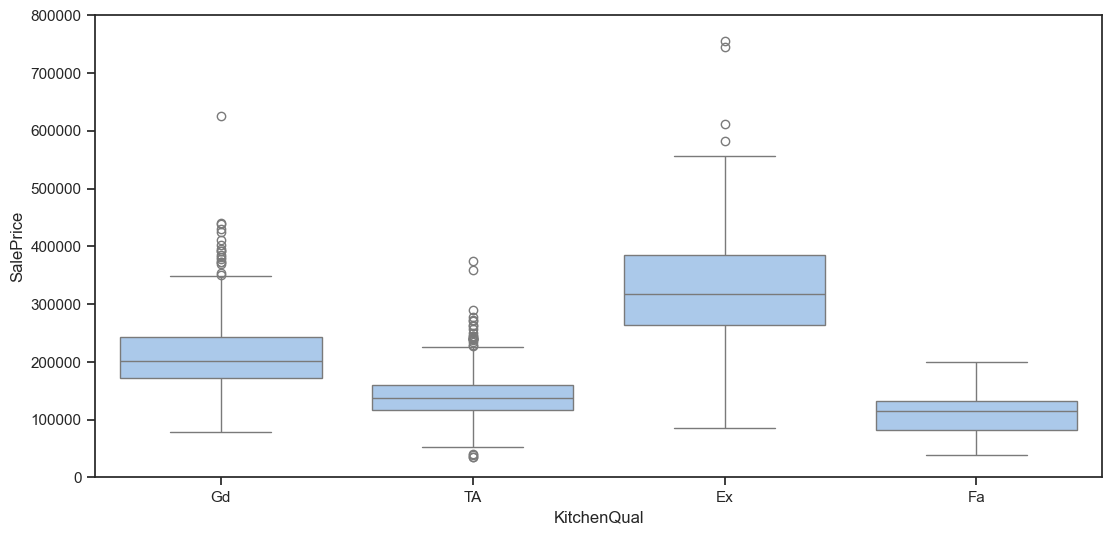

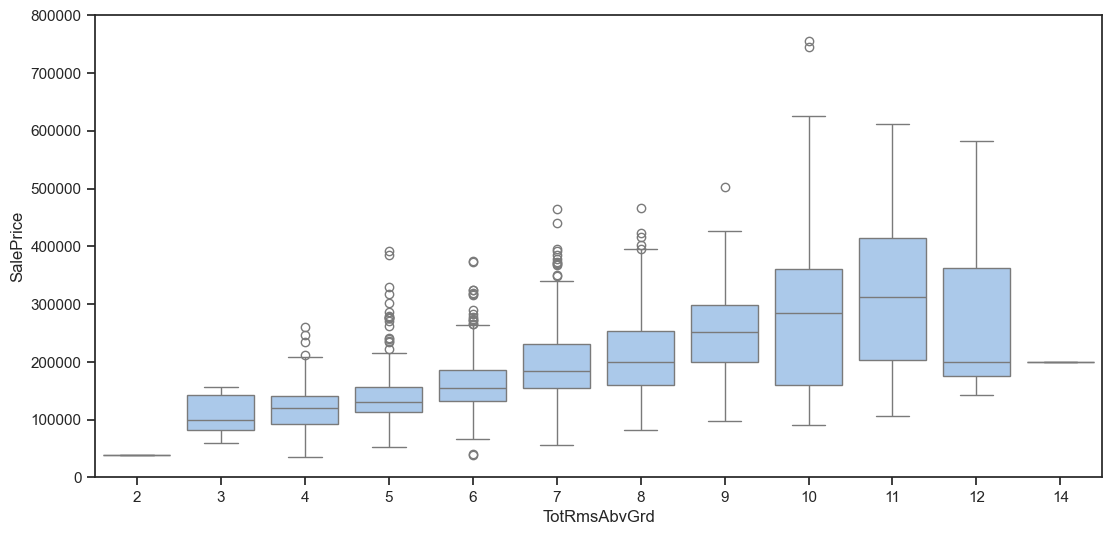

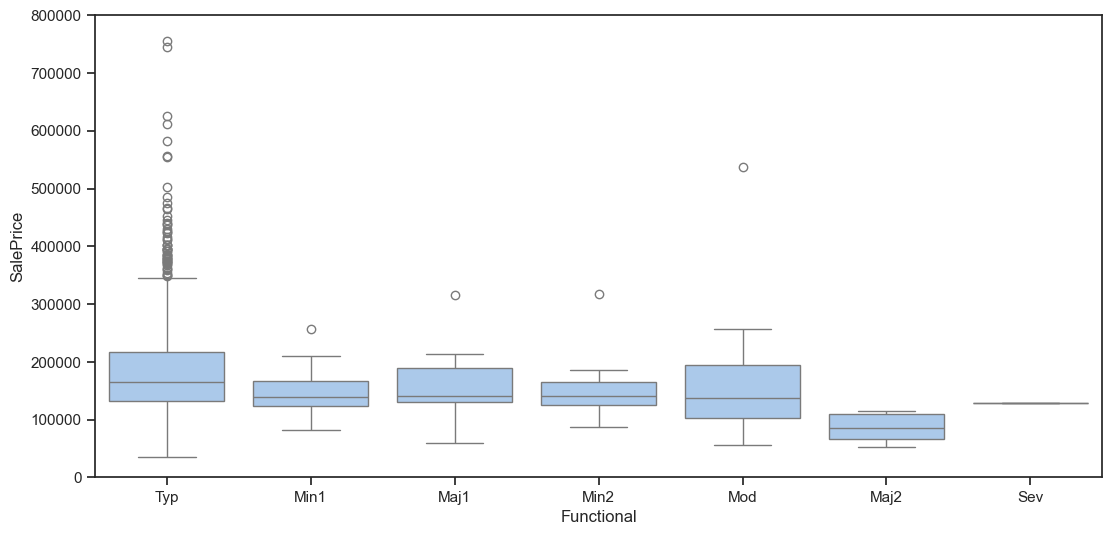

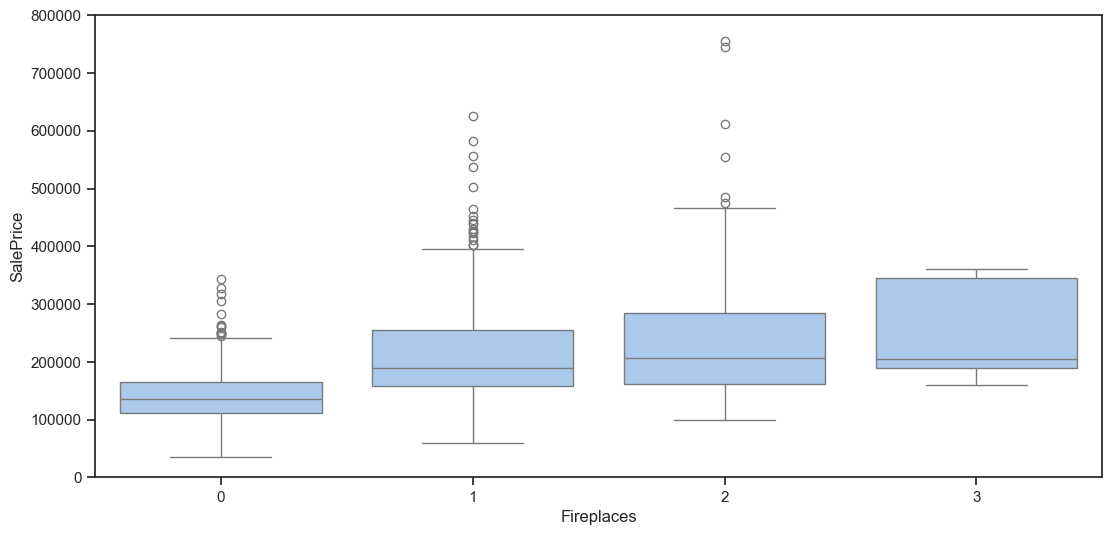

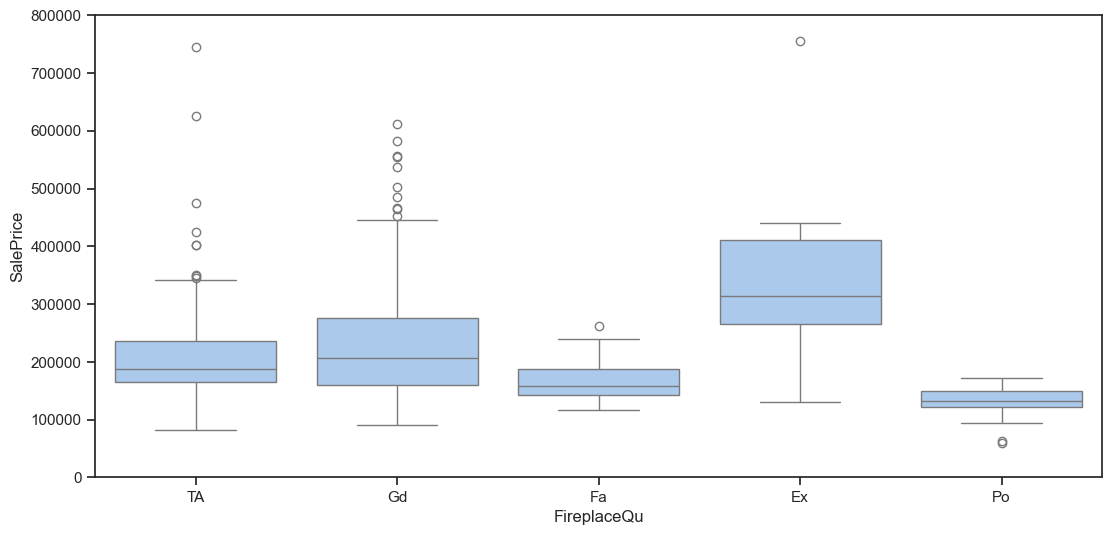

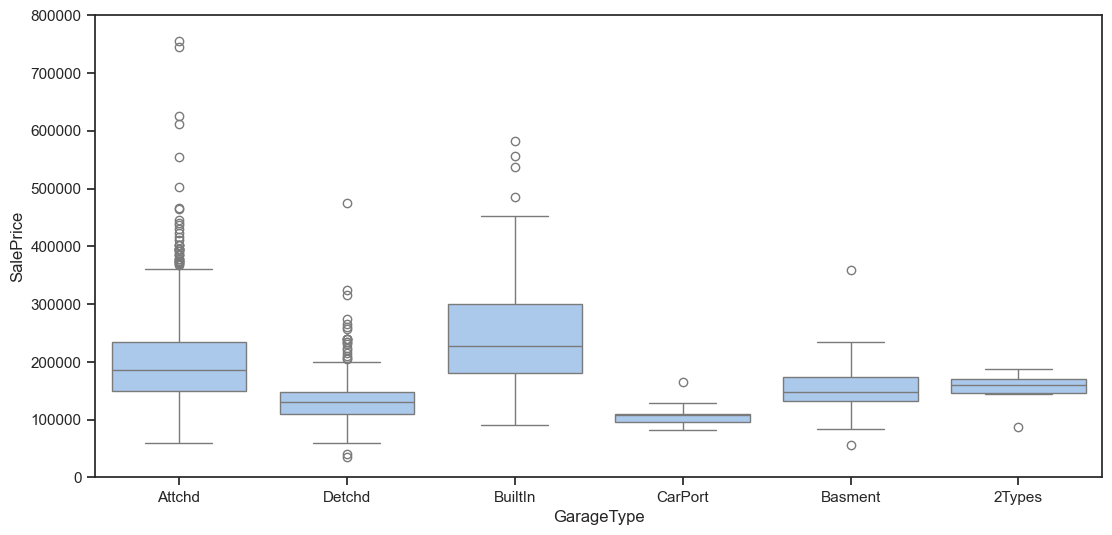

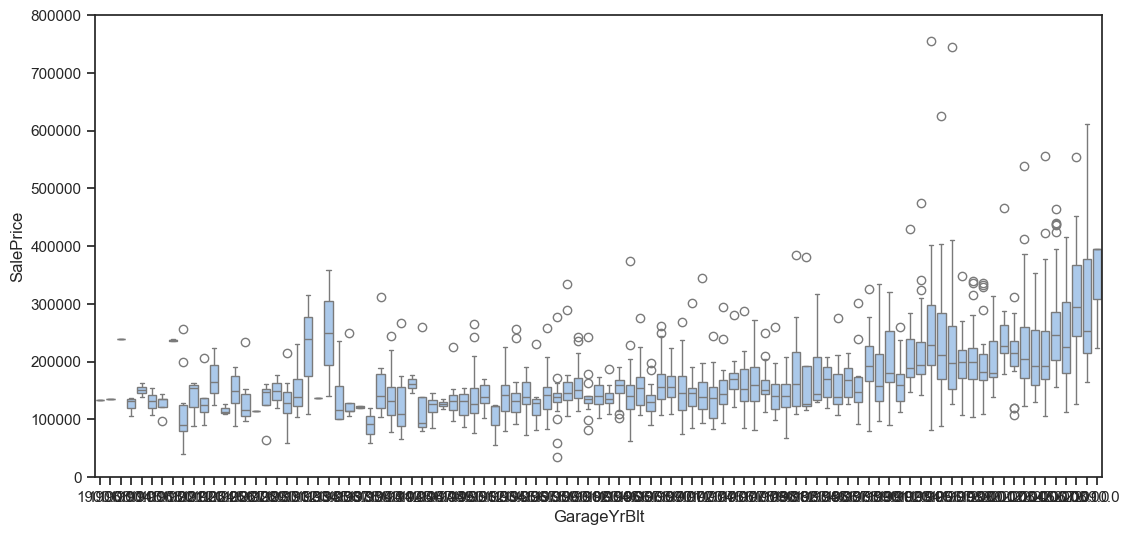

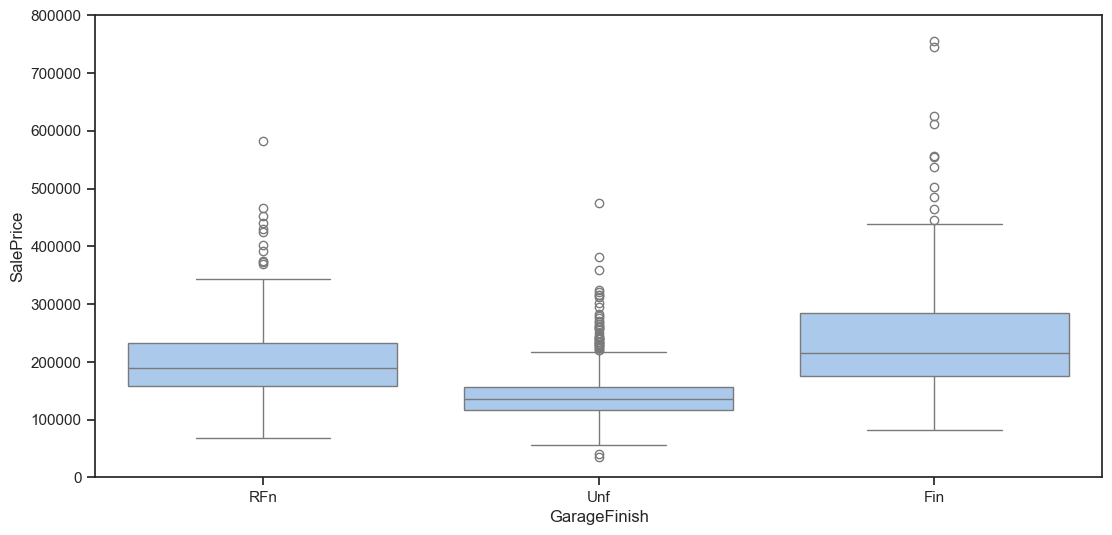

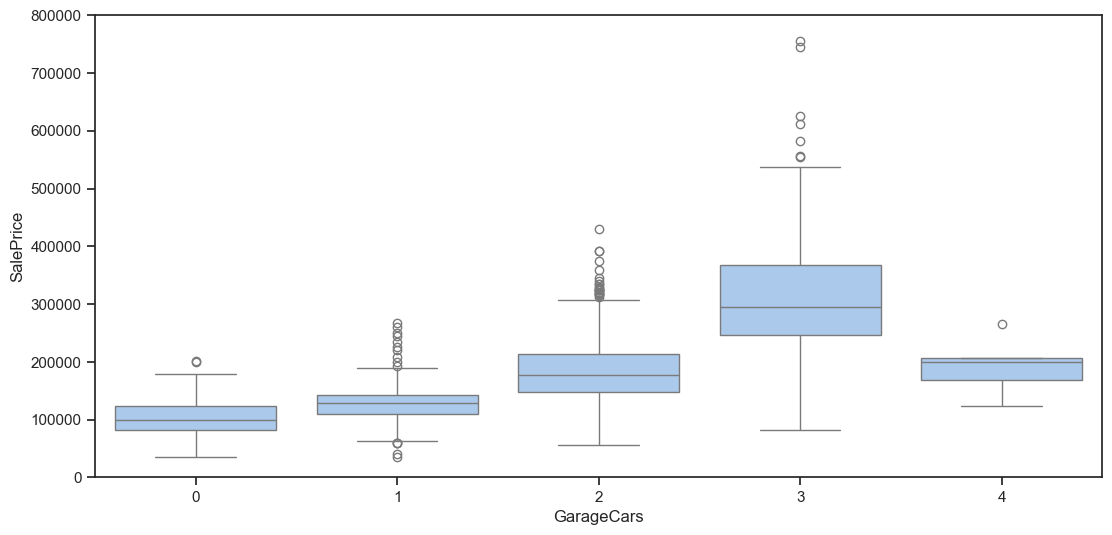

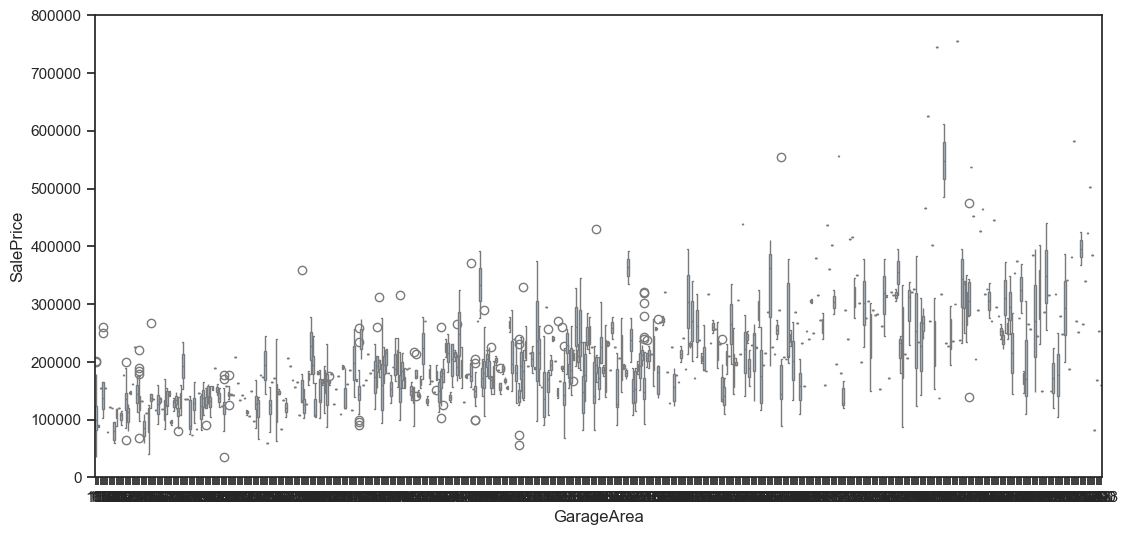

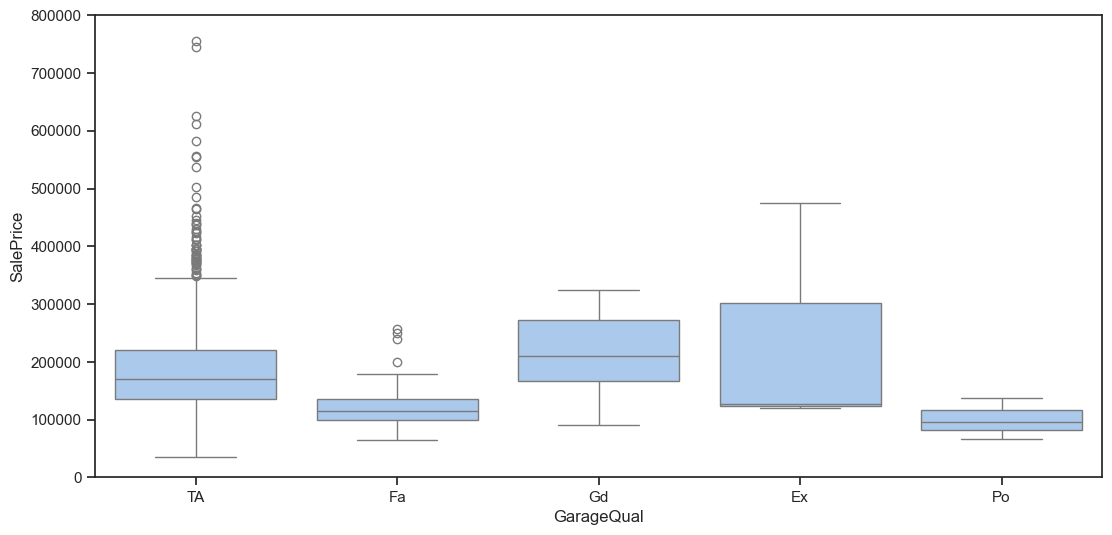

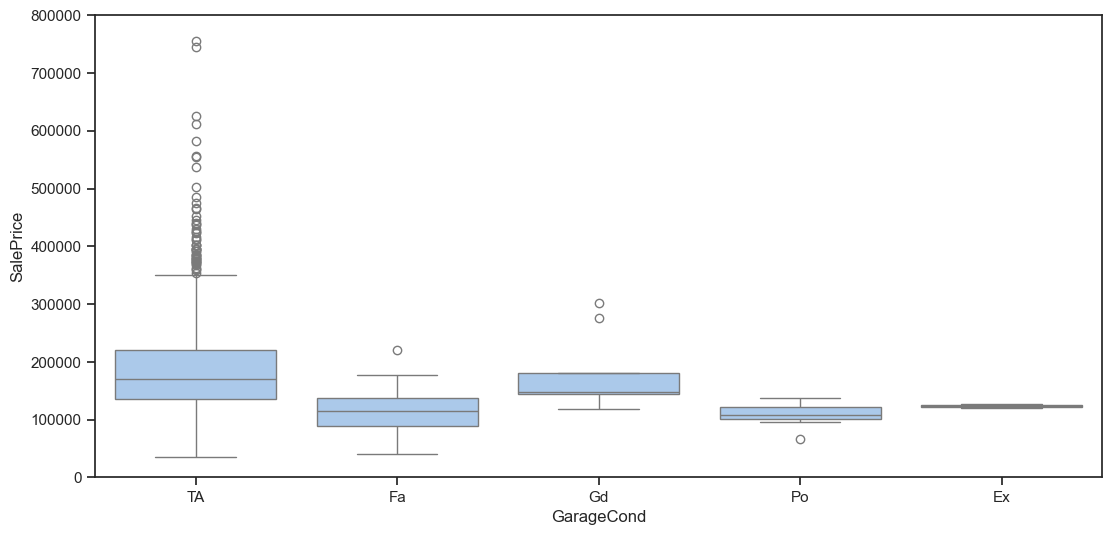

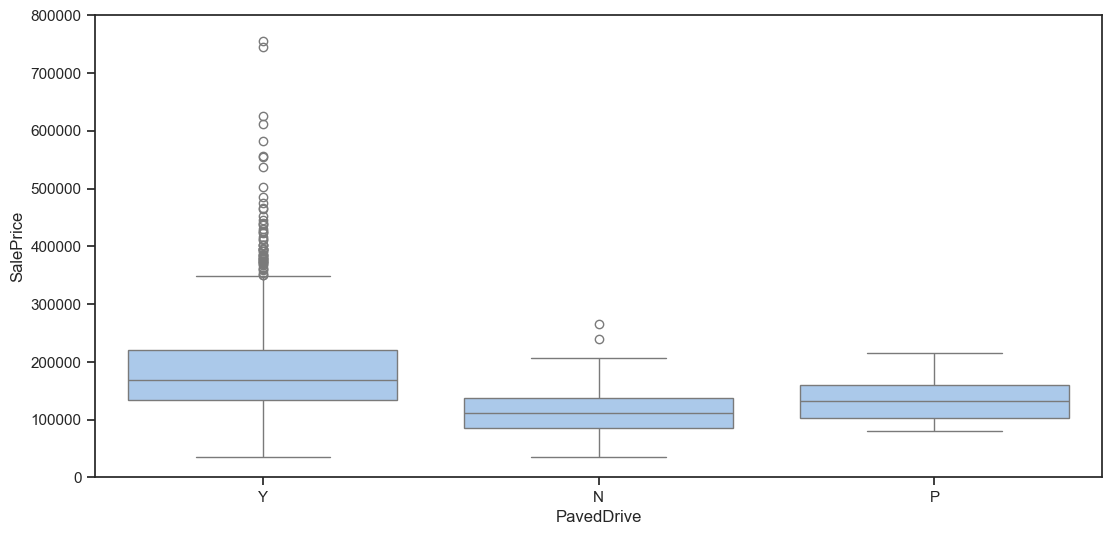

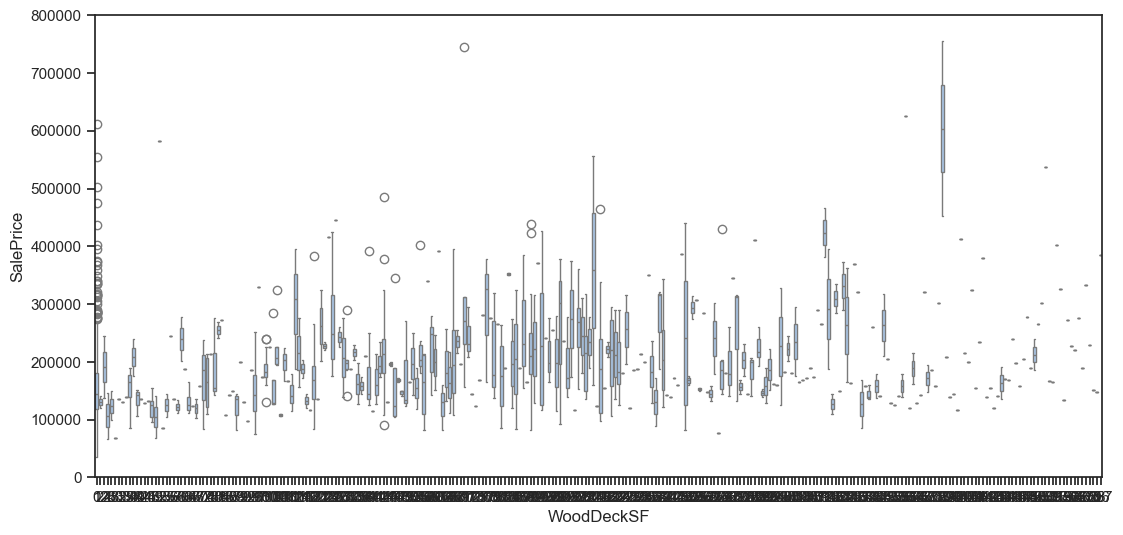

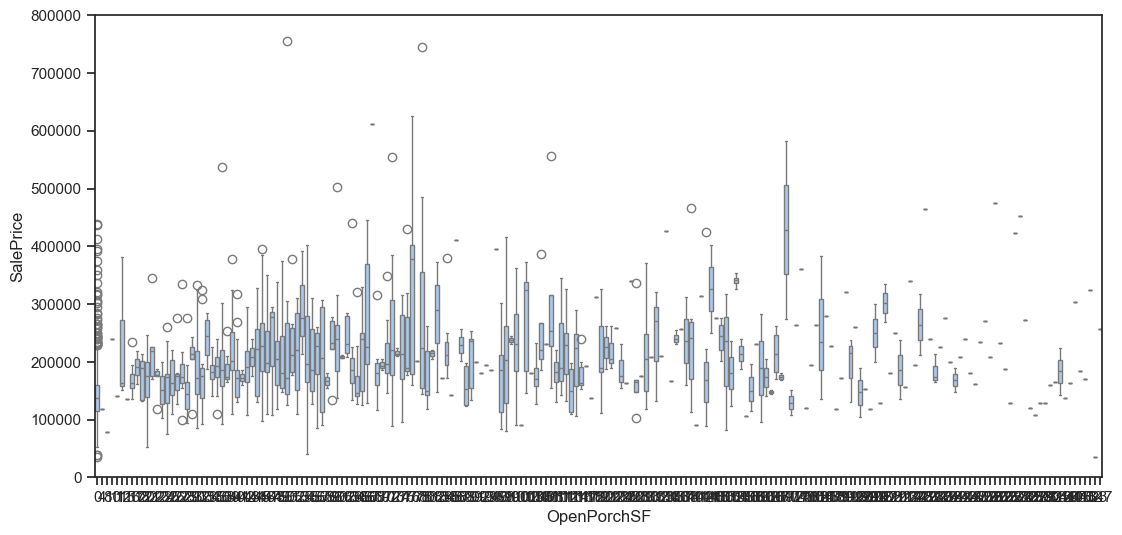

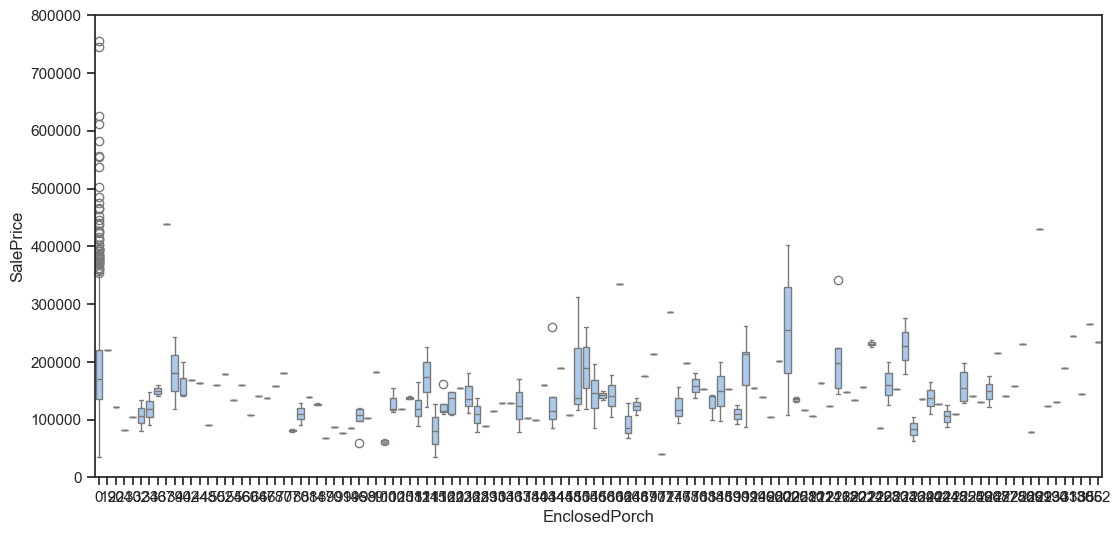

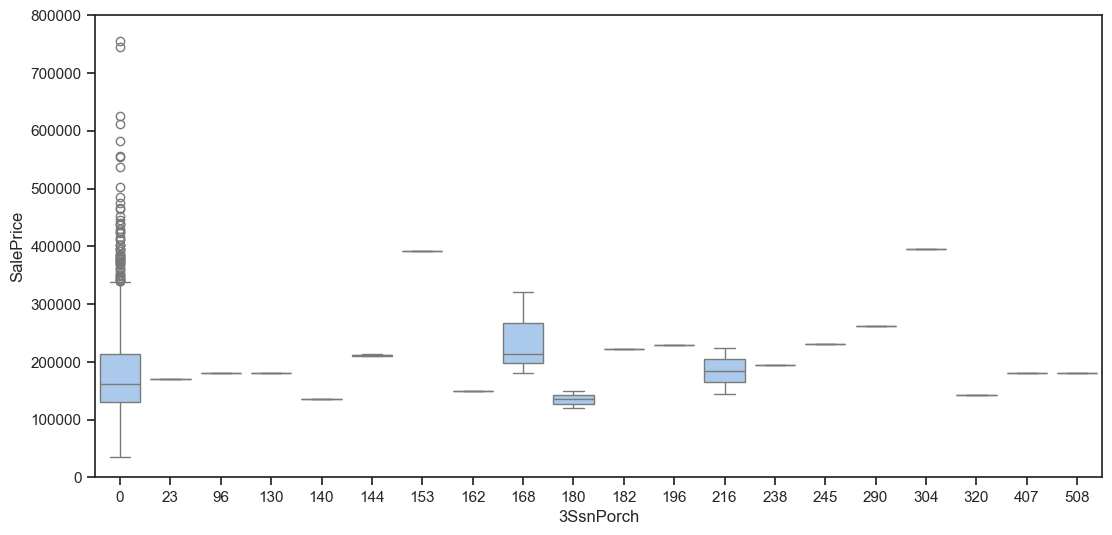

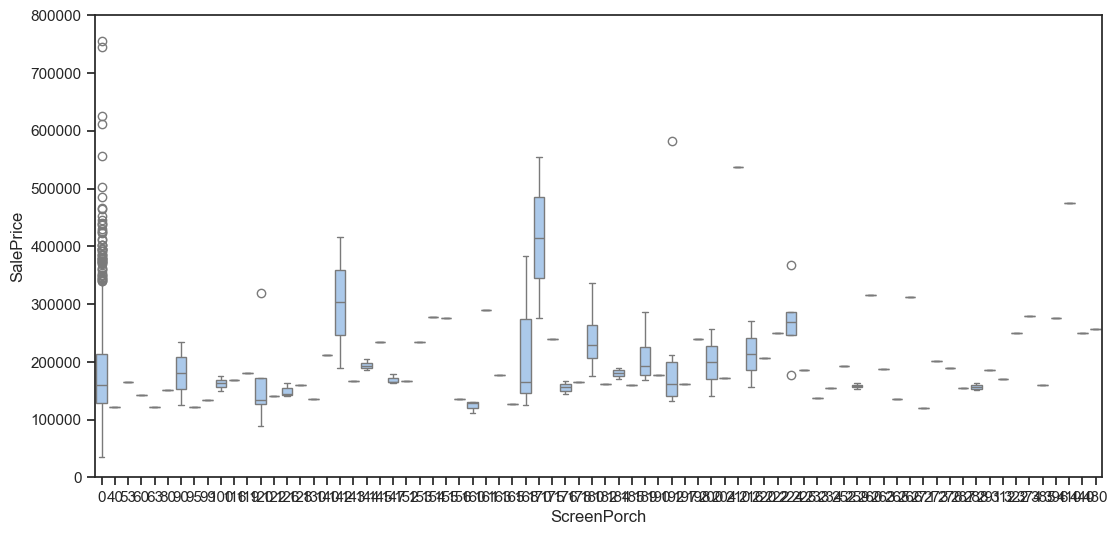

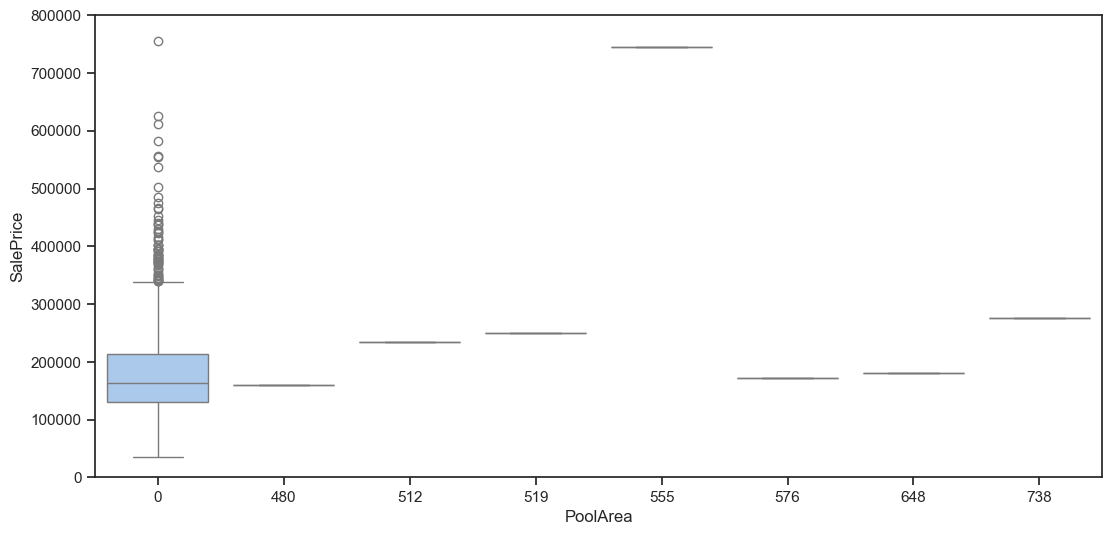

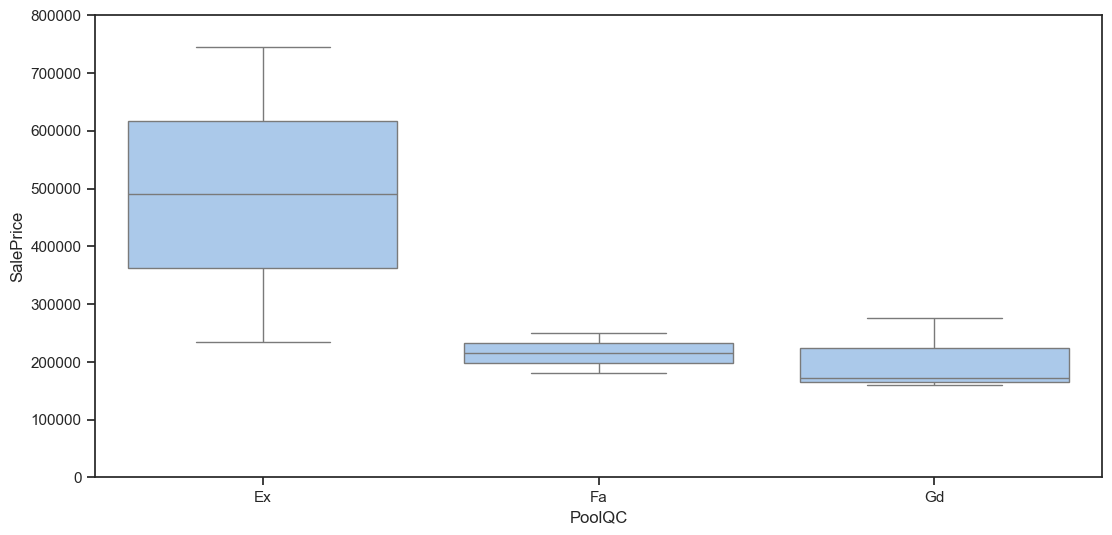

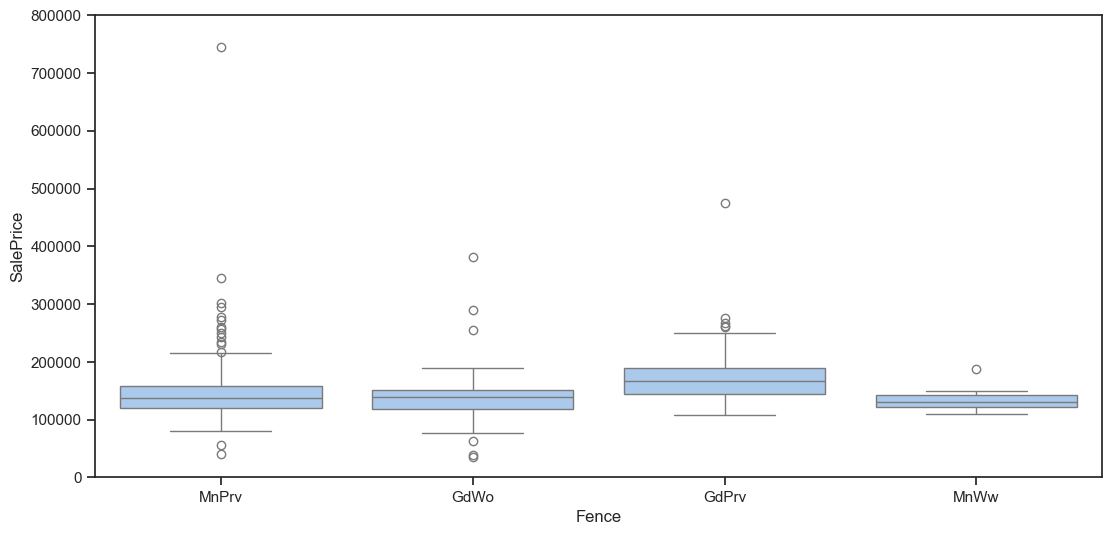

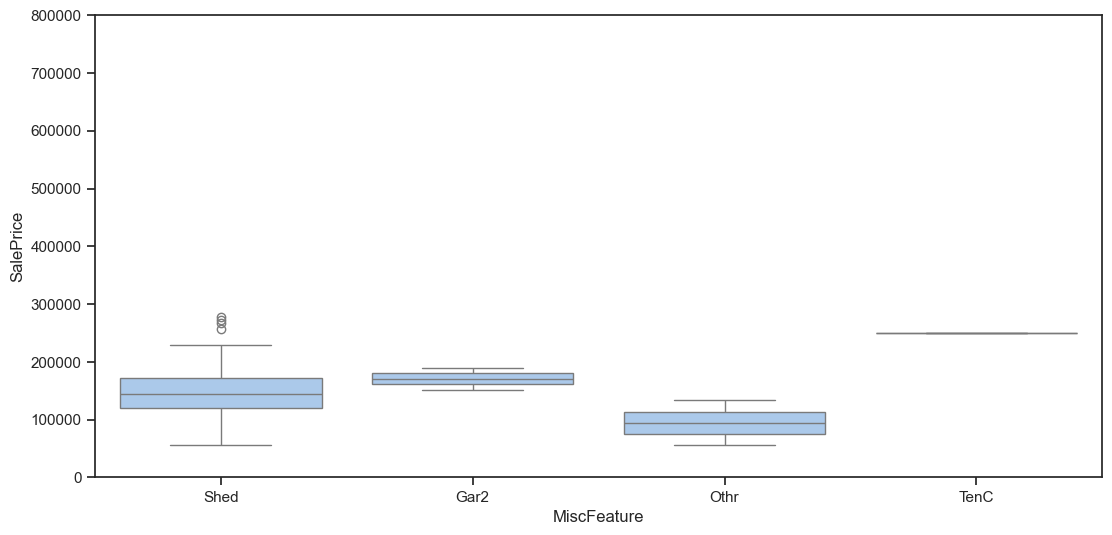

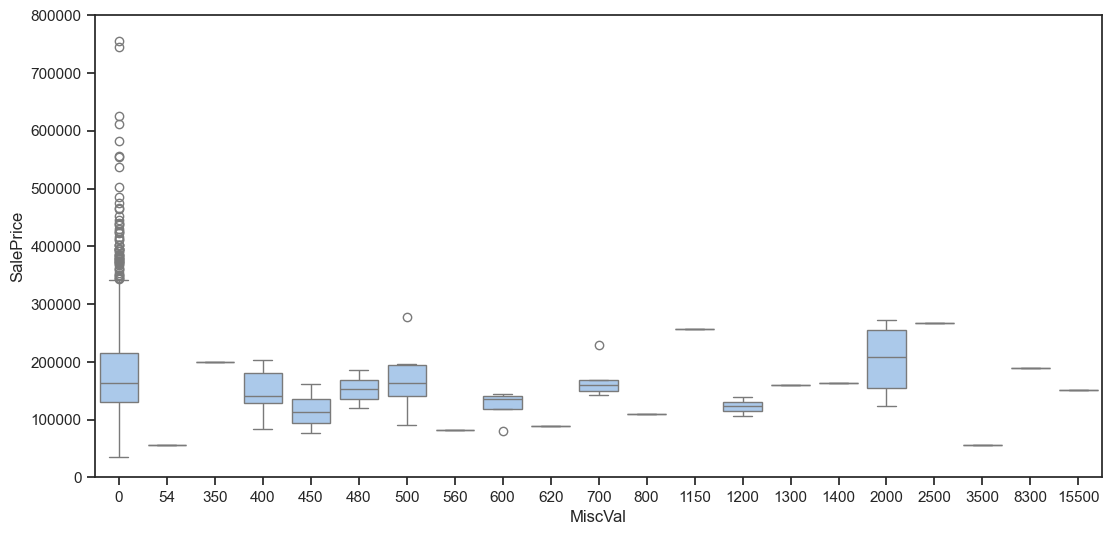

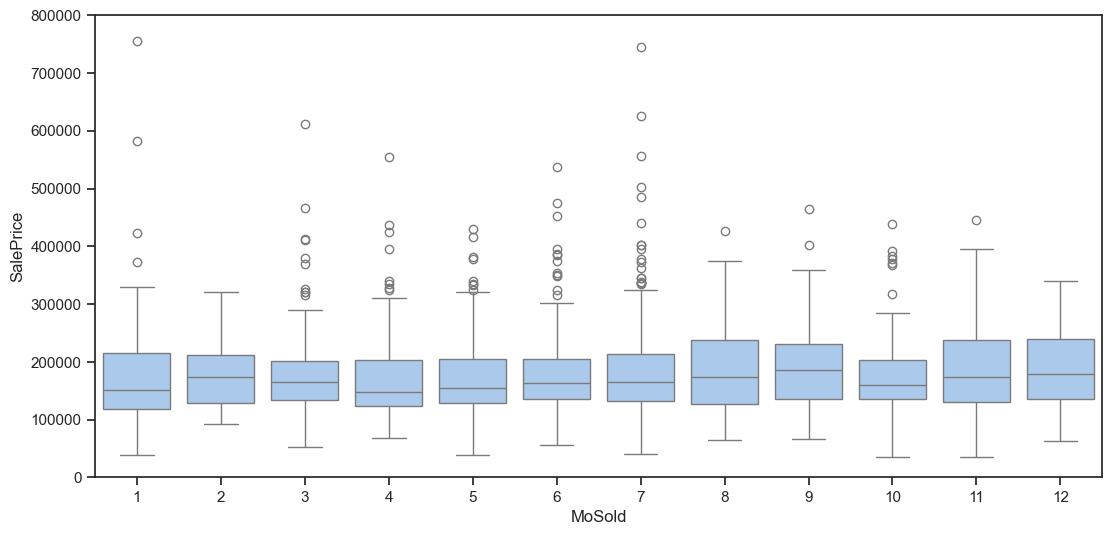

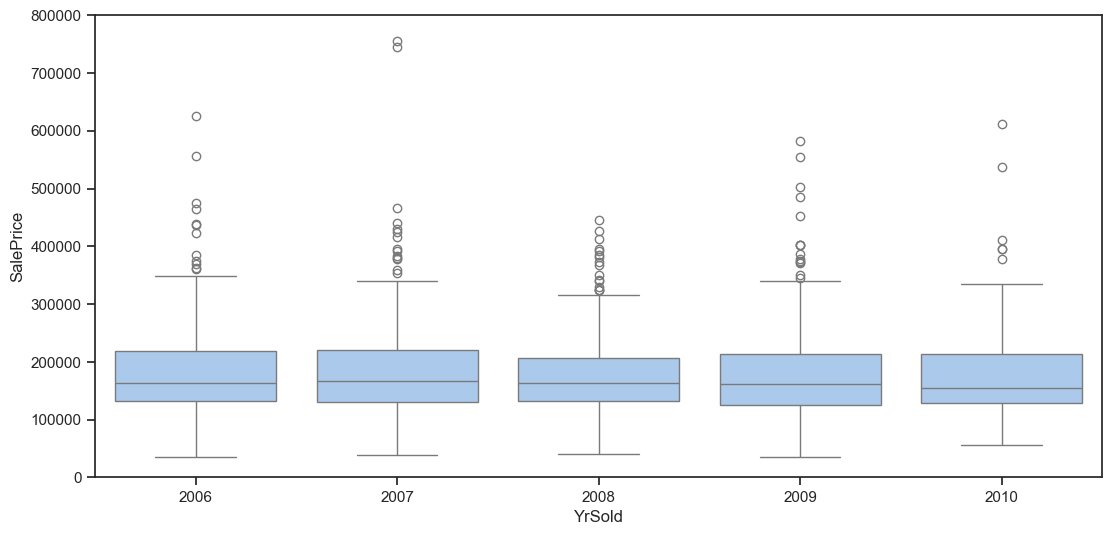

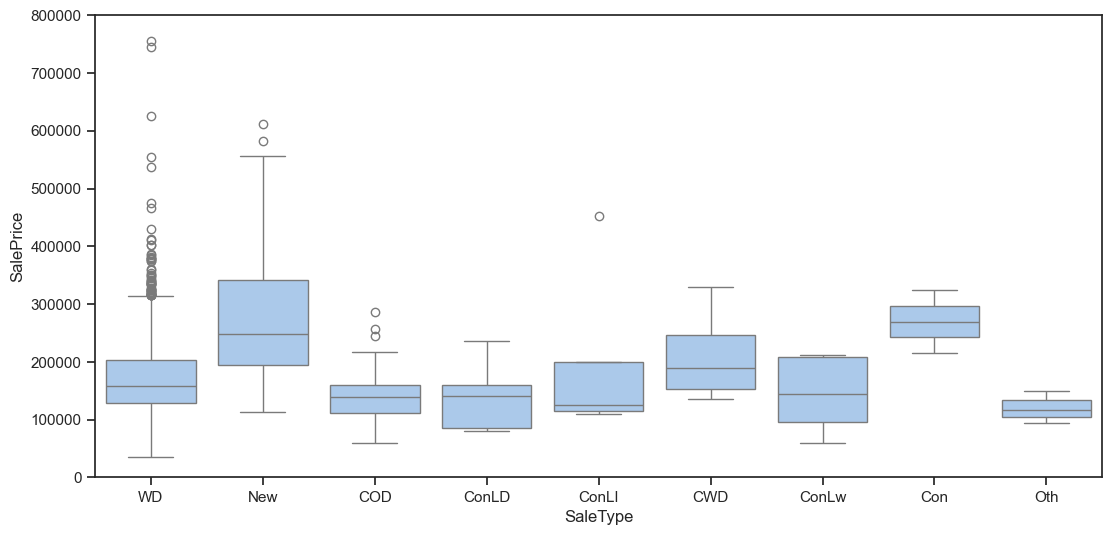

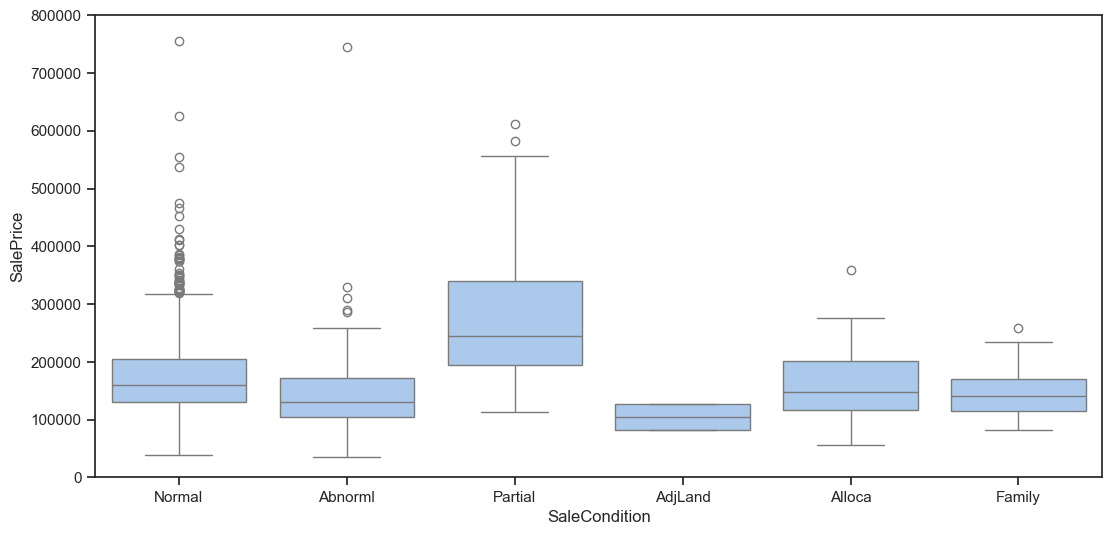

In [65]:
def boxplotgraf(variables, data_frame):
    """
    description: function to create box plot charts for each variable in the list
    variables: list of strings, variables to create box plots for
    data_frame: DataFrame
    
    """
    for var in variables:
        data = pd.concat([data_frame['SalePrice'], data_frame[var]], axis=1)
        plt.subplots(figsize=(13, 6))
        fig = sns.boxplot(x=var, y="SalePrice", data=data)
        fig.axis(ymin=0, ymax=800000)
        plt.show()

# List of variables to create box plots for
variables_to_evaluate = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
   'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
   'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
   'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
   'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
   'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
   'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
   'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
   'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
   'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
   'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
   'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
   'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
   'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
   'SaleCondition']

# Call the function with the list of variables
boxplotgraf(variables_to_evaluate, df_Data_Train)


In [66]:
#First let`s review how is the null values


numerical_atribute.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
WoodDeckSF         0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
MSSubClass         0
HalfBath           0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
OpenPorchSF        0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [67]:
def change_na_mean(variable):
    mean = numerical_atribute[variable].mean()
    numerical_atribute_clean[variable] = numerical_atribute[variable].fillna(mean)
    return numerical_atribute_clean
    
numerical_atribute_clean = numerical_atribute
array_Num_Variables = ['LotFrontage', 'GarageYrBlt','MasVnrArea']

for variable in array_Num_Variables: 
    change_na_mean(variable)
#Check again the values 
numerical_atribute_clean.isna().sum().sort_values(ascending=False)

MSSubClass       0
LotFrontage      0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFinSF1       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [68]:
total = category_columns.isnull().sum().sort_values(ascending=False)
percent = (category_columns.isnull().sum()/category_columns.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
GarageType       81  0.055479
GarageCond       81  0.055479
GarageQual       81  0.055479
GarageFinish     81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtFinType1     37  0.025342
BsmtQual         37  0.025342
BsmtCond         37  0.025342
Electrical        1  0.000685
KitchenQual       0  0.000000
CentralAir        0  0.000000
Functional        0  0.000000
HeatingQC         0  0.000000
Heating           0  0.000000
PavedDrive        0  0.000000
SaleType          0  0.000000
MSZoning          0  0.000000
Street            0  0.000000